<a href="https://colab.research.google.com/github/AndreiAf02/Job-Satisfaction/blob/main/Job_Satisfaction_CZ_Seniority.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install semopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 15.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.3/94.3 kB 3.4 MB/s eta 0:00:00
  Created wheel for semopy: filename=semopy-2.3.11-py3-none-any.whl size=1659682 sha256=637278f039d9a82e5ba59b1984462fdad08b787a64f90248ffded87a96bacd1d
  Stored in directory: /root/.cache/pip/wheels/c6/24/8b/be911b059a61f490f38425eb19bf2fed470a5ead97228e8255
Successfully built semopy


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import semopy
import math
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import statsmodels.api as sm
from scipy.stats import bootstrap, norm

## Data Preprocessing:

In [3]:
# path_to_data = 'https://raw.githubusercontent.com/EduardoAve/Labour-well-being/refs/heads/main/data/02_processed/'
path_to_data2 = 'https://raw.githubusercontent.com/EduardoAve/Labour-well-being/refs/heads/main/data/01_raw-00/'

In [4]:
data_total = pd.read_csv(path_to_data2+ "Final_Dataset.csv", sep=",", header=0)
data_total.columns = data_total.columns.str.replace(".","")
data_total

,Country,Version,1 Gender:,2 Age (in years):,Unnamed: 4,3 Nationality:,4 Current marital (partnership) status:,5 Do you currently care for underage children or dependent relatives?,6 The type of higher education insitution where you primarily work:,7 Subject area of the faculty (higher education institution) where you primarily work:,...,36 I tend to overwork,37 I don’t consider my work to be finished until I am completely satisfied with the result,38 My thoughts revolve around work almost exclusively,"39 When I’m unsuccessful at work, it makes me feel very down","40 If I don’t succeed at something, that just makes me all the more determined",41 I can be calm and collected in almost all situations,42 My life up till now has been characterized by professional success,"43 By and large, I am happy and content",44 I have the full support of my family,Vulnerability
0,2,4,2.0,28.0,2.0,Spanish,3.0,1.0,1.0,1.0,...,4.0,4.0,3.0,4.0,1.0,4.0,1.0,3.0,5.0,4.0
1,2,4,1.0,33.0,2.0,German,2.0,1.0,1.0,3.0,...,5.0,5.0,4.0,4.0,3.0,3.0,2.0,2.0,5.0,4.0
2,2,4,2.0,32.0,2.0,Kosovan,3.0,1.0,NaN,5.0,...,4.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,5.0,3.0
3,2,4,NaN,30.0,2.0,Spain,2.0,1.0,1.0,5.0,...,4.0,5.0,1.0,5.0,2.0,4.0,2.0,3.0,3.0,4.0
4,2,4,1.0,39.0,2.0,Italian,2.0,2.0,1.0,5.0,...,5.0,5.0,3.0,3.0,3.0,2.0,4.0,4.0,5.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2742,1,1,1.0,27.0,4.0,NaN,2.0,1.0,4.0,1.0,...,2.0,4.0,2.0,3.0,2.0,3.0,4.0,3.0,4.0,2.0
2743,1,1,1.0,80.0,3.0,NaN,1.0,1.0,4.0,6.0,...,3.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,NaN,NaN
2744,1,1,2.0,27.0,6.0,NaN,3.0,1.0,4.0,3.0,...,2.0,3.0,1.0,1.0,3.0,3.0,5.0,5.0,3.0,2.0
2745,1,1,2.0,28.0,4.0,NaN,3.0,1.0,4.0,1.0,...,5.0,4.0,4.0,4.0,3.0,3.0,3.0,1.0,4.0,NaN


In [5]:
print(data_total.columns.tolist())

['Country', 'Version', '1 Gender:', '2 Age (in years):', 'Unnamed: 4', '3 Nationality:', '4 Current marital (partnership) status:', '5 Do you currently care for underage children or dependent relatives?', '6 The type of higher education insitution where you primarily work:', '7 Subject area of the faculty (higher education institution) where you primarily work:', '8 Duration of your current employment contract at the higher education institution where you primarily work:', '9 Extent of employment in higher education (in hours/week, aggregated for all higher education institutions where you work):', '10 Actual average weekly working hours in higher education (in a typical semester week):', 'Effort (less, more, equal)', 'Effort [%]', 'Income CZK', 'Income EURO', 'Euro Adj', 'Salary/hour', 'Salary effort/hour', '12 Do you hold a leadership position at a higher education institution?', '13 How influential are you in helping to shape key academic policies at your institution at the level of

In [6]:
data_at_total = data_total[data_total['Country']==1].reset_index(drop=True)
data_cz_total = data_total[data_total['Country']==2].reset_index(drop=True)
data_cz_total

,Country,Version,1 Gender:,2 Age (in years):,Unnamed: 4,3 Nationality:,4 Current marital (partnership) status:,5 Do you currently care for underage children or dependent relatives?,6 The type of higher education insitution where you primarily work:,7 Subject area of the faculty (higher education institution) where you primarily work:,...,36 I tend to overwork,37 I don’t consider my work to be finished until I am completely satisfied with the result,38 My thoughts revolve around work almost exclusively,"39 When I’m unsuccessful at work, it makes me feel very down","40 If I don’t succeed at something, that just makes me all the more determined",41 I can be calm and collected in almost all situations,42 My life up till now has been characterized by professional success,"43 By and large, I am happy and content",44 I have the full support of my family,Vulnerability
0,2,4,2.0,28.0,2.0,Spanish,3.0,1.0,1.0,1.0,...,4.0,4.0,3.0,4.0,1.0,4.0,1.0,3.0,5.0,4.0
1,2,4,1.0,33.0,2.0,German,2.0,1.0,1.0,3.0,...,5.0,5.0,4.0,4.0,3.0,3.0,2.0,2.0,5.0,4.0
2,2,4,2.0,32.0,2.0,Kosovan,3.0,1.0,NaN,5.0,...,4.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,5.0,3.0
3,2,4,NaN,30.0,2.0,Spain,2.0,1.0,1.0,5.0,...,4.0,5.0,1.0,5.0,2.0,4.0,2.0,3.0,3.0,4.0
4,2,4,1.0,39.0,2.0,Italian,2.0,2.0,1.0,5.0,...,5.0,5.0,3.0,3.0,3.0,2.0,4.0,4.0,5.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1414,2,2,1.0,57.0,1.0,NaN,1.0,1.0,1.0,9.0,...,2.0,2.0,2.0,4.0,4.0,5.0,4.0,4.0,4.0,1.0
1415,2,2,1.0,40.0,1.0,NaN,2.0,1.0,1.0,5.0,...,2.0,4.0,2.0,2.0,4.0,4.0,4.0,4.0,4.0,2.0
1416,2,2,2.0,29.0,2.0,Slovenská republika,2.0,1.0,1.0,3.0,...,4.0,4.0,3.0,5.0,4.0,2.0,3.0,3.0,5.0,3.0
1417,2,2,2.0,50.0,1.0,NaN,1.0,1.0,1.0,9.0,...,4.0,3.0,1.0,1.0,NaN,NaN,NaN,5.0,4.0,NaN


In [7]:
data_cz_job = data_cz_total[['2 Age (in years):',
    'CZ_15 Your current position at the higher education institution, where you primarily work: ', ## Current Position
    'Salary/hour',
    '8 Duration of your current employment contract at the higher education institution where you primarily work:', ## Contract Duration
    '10 Actual average weekly working hours in higher education (in a typical semester week):', ## Actual Weekly Working Hours
    'Effort [%]', ## Effort = actual hours/contract hours
    '1 Teaching (classroom instruction, preparation of instructional materials and lesson plans, advising students, reading and evaluating student work, examination management, etc)', ## Teaching hours
    '2 Research (reading literature, designing and conducting experiments, collecting and analysing data, writing articles or other scientific texts, etc)', ## Research Hours
    '3 Activities related to externally funded research projects (searching for information on available funding sources, preparation of grant applications and project reports, project management and administration, etc)', ## Research Admin hours
    '4 Organisational and administrative activities (organising and attending meetings, dealing with tasks and documents not directly related to teaching, research, or externally funded research projects, etc)', ## General Admin hours
    '12 Do you hold a leadership position at a higher education institution?', ## Leadership position
    '13 How influential are you in helping to shape key academic policies at your institution at the level of department or similar unit?', ## Policy Influence
    ## ACADEMIC RESOURCES:
    '1 Facilities and technological equipment (offices, classrooms, laboratories, computers, projectors, teaching software)', ## Academic Resources - FACILITIES
    '2 Research equipment (instruments, tools, materials, software for working with data)', ## Academic Resources - RESEARCH EQUIP
    '3 Availability of scientific literature (access to up-to-date scientific articles and books)', ## Academic Resources - LITERATURE
    '4 Personnel support (support from secretarial, administrative and technical staff, laboratory technicians, etc)', ## Academic Resources - SUPPORT
    '5 Opportunities for personal and professional development (offer and availability of professional courses and internships, opportunities to participate at conferences and other professional events)', ## Academic Resources - PD
    '6 Availability of resources for research funding', ## Academic Resources - FUNDING
    ## PERFORMANCE PRESSURE:
    '1 At my institution, there is a strong performance orientation',
    ## PERCEIVED AUTONOMY:
    '2 I feel like I can be myself at my job', ## KEEP ORDER
    "3 At work, I often feel like I have to follow other people’s commands", ## TO INVERT
    '4 If I could choose, I would do things at work differently', ## TO INVERT
    '5 The tasks I have to do at work are in line with what I really want to do', ## KEEP ORDER
    '6 I feel free to do my job the way I think it could best be done', ## KEEP ORDER
    '7 In my job, I feel forced to do things I do not want to do ', ## TO INVERT
    ## QUALITY OF LEADERSHIP:
    '1  makes sure that the members of staff have good development opportunities', ## KEEP ORDER
    '2  gives high priority to job satisfaction', ## KEEP ORDER
    '3  is good at work planning', ## KEEP ORDER
    '4  is good at solving conflicts ', ## KEEP ORDER
    ## SENSE OF COMMUNITY:
    '1 There is a good atmosphere between myself and my colleagues ',
    '2 There is good co-operation between the colleagues at work',
    '3 I feel part of a community at my place of work',
    ## JOB SATISFACTION:
    '1  your work prospects? ',
    '2   the physical working conditions (eg facilities, equipment, physical working environment)?',
    '3  the way your abilities are used?',
    '4  your salary?',
    '5  your job as a whole, everything taken into consideration? '
]]

In [8]:
data_cz_job.columns.tolist()

['2 Age (in years):',
 'CZ_15 Your current position at the higher education institution, where you primarily work: ',
 'Salary/hour',
 '8 Duration of your current employment contract at the higher education institution where you primarily work:',
 '10 Actual average weekly working hours in higher education (in a typical semester week):',
 'Effort [%]',
 '1 Teaching (classroom instruction, preparation of instructional materials and lesson plans, advising students, reading and evaluating student work, examination management, etc)',
 '2 Research (reading literature, designing and conducting experiments, collecting and analysing data, writing articles or other scientific texts, etc)',
 '3 Activities related to externally funded research projects (searching for information on available funding sources, preparation of grant applications and project reports, project management and administration, etc)',
 '4 Organisational and administrative activities (organising and attending meetings, deali

In [9]:
data_cz_job.columns = ['Age',
    'Current_position', ## Current Position
    'Salary',
    'Contract_duration', ## Contract Duration
    'Actual_hrs', ## Actual Weekly Working Hours
    'Effort', ## Effort = actual hours/contract hours
    'Teaching_hrs', ## Teaching hours
    'Research_hrs', ## Research Hours
    'External_funding_hrs', ## External Research Funding hours
    'Admin_hrs', ## General Admin hours
    'Leadership_position', ## Leadership position
    'Policy_influence', ## Policy Influence
    ## ACADEMIC RESOURCES:
    'Acad_res_facility', ## Academic Resources - FACILITIES
    'Acad_res_equip', ## Academic Resources - RESEARCH EQUIP
    'Acad_res_lit', ## Academic Resources - LITERATURE
    'Acad_res_support', ## Academic Resources - SUPPORT
    'Acad_res_PD', ## Academic Resources - PD
    'Acad_res_funding', ## Academic Resources - FUNDING
    ## PERFORMANCE PRESSURE:
    'Performance_pressure',
    ## PERCEIVED AUTONOMY:
    'Be_myself', ## KEEP ORDER
    "Follow_commands", ## TO INVERT
    'Do_differently', ## TO INVERT
    'Want_to_do', ## KEEP ORDER
    'Done_best', ## KEEP ORDER
    'Forced_to_do', ## TO INVERT
    ## QUALITY OF LEADERSHIP:
    'Development_opportunities', ## KEEP ORDER
    'Prioritizes_satisfaction', ## KEEP ORDER
    'Work_planning', ## KEEP ORDER
    'Solving_conflicts', ## KEEP ORDER
    ## SENSE OF COMMUNITY:
    'Good_atmosphere',
    'Good_cooperation',
    'Part_of_community',
    ## JOB SATISFACTION:
    'Work_prospects',
    'Physical_working_conditions',
    'Use_of_abilities',
    'Satisfaction_w_salary',
    'Overall_satisfaction']

In [10]:
data_cz_job.columns.tolist()

['Age',
 'Current_position',
 'Salary',
 'Contract_duration',
 'Actual_hrs',
 'Effort',
 'Teaching_hrs',
 'Research_hrs',
 'External_funding_hrs',
 'Admin_hrs',
 'Leadership_position',
 'Policy_influence',
 'Acad_res_facility',
 'Acad_res_equip',
 'Acad_res_lit',
 'Acad_res_support',
 'Acad_res_PD',
 'Acad_res_funding',
 'Performance_pressure',
 'Be_myself',
 'Follow_commands',
 'Do_differently',
 'Want_to_do',
 'Done_best',
 'Forced_to_do',
 'Development_opportunities',
 'Prioritizes_satisfaction',
 'Work_planning',
 'Solving_conflicts',
 'Good_atmosphere',
 'Good_cooperation',
 'Part_of_community',
 'Work_prospects',
 'Physical_working_conditions',
 'Use_of_abilities',
 'Satisfaction_w_salary',
 'Overall_satisfaction']

In [11]:
data_cz_job = data_cz_job.dropna(subset=['Age', 'Current_position', 'Leadership_position']).reset_index(drop=True)
for col in data_cz_job.columns:
  data_cz_job[col] = data_cz_job[col].astype(str).str.replace(',', '.').astype(float)
data_cz_job.to_csv('data_cz_job.csv')
data_cz_job

,Age,Current_position,Salary,Contract_duration,Actual_hrs,Effort,Teaching_hrs,Research_hrs,External_funding_hrs,Admin_hrs,...,Work_planning,Solving_conflicts,Good_atmosphere,Good_cooperation,Part_of_community,Work_prospects,Physical_working_conditions,Use_of_abilities,Satisfaction_w_salary,Overall_satisfaction
0,28.0,3.0,9.613782,2.0,50.0,125.0,5.0,29.0,1.0,15.0,...,3.0,2.0,4.0,3.0,1.0,1.0,3.0,3.0,2.0,2.0
1,33.0,3.0,4.326923,3.0,50.0,125.0,5.0,30.0,5.0,10.0,...,2.0,2.0,2.0,1.0,2.0,3.0,4.0,2.0,1.0,2.0
2,32.0,3.0,NaN,4.0,1.5,100.0,NaN,NaN,NaN,NaN,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
3,30.0,3.0,8.213535,1.0,40.0,100.0,20.0,10.0,NaN,10.0,...,1.0,1.0,5.0,1.0,3.0,3.0,4.0,3.0,1.0,3.0
4,39.0,4.0,7.931370,2.0,NaN,NaN,20.0,20.0,10.0,3.0,...,4.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1374,45.0,4.0,8.652404,1.0,40.0,100.0,17.0,17.0,4.0,2.0,...,3.0,3.0,4.0,3.0,3.0,3.0,2.0,3.0,1.0,4.0
1375,57.0,6.0,12.017228,2.0,40.0,100.0,18.0,6.0,1.0,9.0,...,2.0,2.0,4.0,4.0,5.0,4.0,4.0,4.0,4.0,4.0
1376,40.0,4.0,10.334816,1.0,40.0,100.0,22.0,6.0,4.0,8.0,...,3.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
1377,29.0,4.0,9.613782,2.0,40.0,100.0,5.0,1.0,1.0,1.0,...,4.0,4.0,5.0,5.0,5.0,4.0,4.0,3.0,3.0,3.0


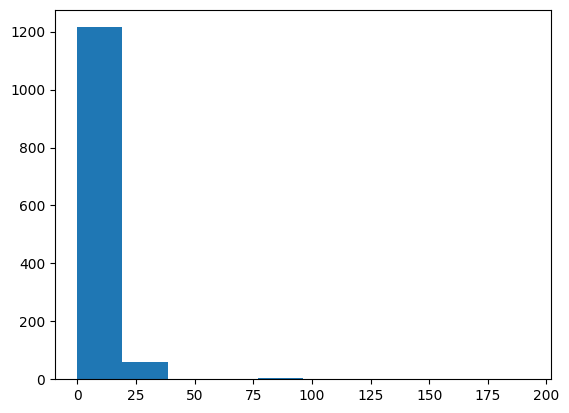

In [12]:
# sm.qqplot(data_cz_job['Salary'], line='45')
# stats.probplot(data_cz_job['Salary'], dist="norm", plot=plt)
plt.hist(data_cz_job['Salary'])
plt.show()

In [13]:
## Using the IQR to eliminate outliers for Salary, Average_hours, and Effort:

Q1_salary = data_cz_job['Salary'].quantile(0.25)
Q3_salary = data_cz_job['Salary'].quantile(0.75)
IQR_salary = Q3_salary - Q1_salary

lower_bound_salary = Q1_salary - 3. * IQR_salary
upper_bound_salary = Q3_salary + 3. * IQR_salary

Q1_hrs = data_cz_job['Actual_hrs'].quantile(0.25)
Q3_hrs = data_cz_job['Actual_hrs'].quantile(0.75)
IQR_hrs = Q3_hrs - Q1_hrs

lower_bound_hrs = Q1_hrs - 3. * IQR_hrs
upper_bound_hrs = Q3_hrs + 3. * IQR_hrs

Q1_effort = data_cz_job['Effort'].quantile(0.25)
Q3_effort = data_cz_job['Effort'].quantile(0.75)
IQR_effort = Q3_effort - Q1_effort

lower_bound_effort = Q1_effort - 3.  * IQR_effort
upper_bound_effort = Q3_effort + 3. * IQR_effort




data_cz_job = data_cz_job[(data_cz_job['Salary'] > lower_bound_salary) & (data_cz_job['Salary'] < upper_bound_salary) &
                          (data_cz_job['Actual_hrs'] > lower_bound_hrs) & (data_cz_job['Actual_hrs'] < upper_bound_hrs) &
                           (data_cz_job['Effort'] > lower_bound_effort) & (data_cz_job['Effort'] < upper_bound_effort)].reset_index(drop=True)

data_cz_job

,Age,Current_position,Salary,Contract_duration,Actual_hrs,Effort,Teaching_hrs,Research_hrs,External_funding_hrs,Admin_hrs,...,Work_planning,Solving_conflicts,Good_atmosphere,Good_cooperation,Part_of_community,Work_prospects,Physical_working_conditions,Use_of_abilities,Satisfaction_w_salary,Overall_satisfaction
0,28.0,3.0,9.613782,2.0,50.0,125.0,5.0,29.0,1.0,15.0,...,3.0,2.0,4.0,3.0,1.0,1.0,3.0,3.0,2.0,2.0
1,33.0,3.0,4.326923,3.0,50.0,125.0,5.0,30.0,5.0,10.0,...,2.0,2.0,2.0,1.0,2.0,3.0,4.0,2.0,1.0,2.0
2,30.0,3.0,8.213535,1.0,40.0,100.0,20.0,10.0,NaN,10.0,...,1.0,1.0,5.0,1.0,3.0,3.0,4.0,3.0,1.0,3.0
3,39.0,4.0,9.613782,2.0,40.0,100.0,33.0,10.0,6.0,2.5,...,5.0,5.0,5.0,5.0,5.0,4.0,5.0,2.0,1.0,2.0
4,44.0,4.0,13.699640,1.0,40.0,100.0,20.0,2.0,5.0,13.0,...,4.0,3.0,4.0,5.0,5.0,5.0,3.0,4.0,2.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1107,45.0,4.0,8.652404,1.0,40.0,100.0,17.0,17.0,4.0,2.0,...,3.0,3.0,4.0,3.0,3.0,3.0,2.0,3.0,1.0,4.0
1108,57.0,6.0,12.017228,2.0,40.0,100.0,18.0,6.0,1.0,9.0,...,2.0,2.0,4.0,4.0,5.0,4.0,4.0,4.0,4.0,4.0
1109,40.0,4.0,10.334816,1.0,40.0,100.0,22.0,6.0,4.0,8.0,...,3.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
1110,29.0,4.0,9.613782,2.0,40.0,100.0,5.0,1.0,1.0,1.0,...,4.0,4.0,5.0,5.0,5.0,4.0,4.0,3.0,3.0,3.0


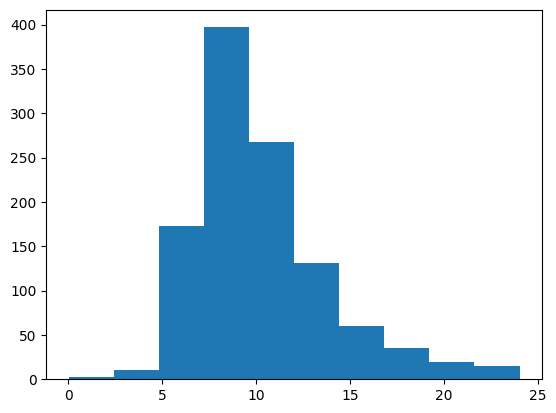

In [14]:
# stats.probplot(data_cz_job['Salary'], dist="norm", plot=plt)
plt.hist(data_cz_job['Salary'])
plt.show()

In [15]:
np.sort(data_cz_job['Leadership_position'].unique())

array([1., 2., 3., 4.])

In [16]:
data_cz_job

,Age,Current_position,Salary,Contract_duration,Actual_hrs,Effort,Teaching_hrs,Research_hrs,External_funding_hrs,Admin_hrs,...,Work_planning,Solving_conflicts,Good_atmosphere,Good_cooperation,Part_of_community,Work_prospects,Physical_working_conditions,Use_of_abilities,Satisfaction_w_salary,Overall_satisfaction
0,28.0,3.0,9.613782,2.0,50.0,125.0,5.0,29.0,1.0,15.0,...,3.0,2.0,4.0,3.0,1.0,1.0,3.0,3.0,2.0,2.0
1,33.0,3.0,4.326923,3.0,50.0,125.0,5.0,30.0,5.0,10.0,...,2.0,2.0,2.0,1.0,2.0,3.0,4.0,2.0,1.0,2.0
2,30.0,3.0,8.213535,1.0,40.0,100.0,20.0,10.0,NaN,10.0,...,1.0,1.0,5.0,1.0,3.0,3.0,4.0,3.0,1.0,3.0
3,39.0,4.0,9.613782,2.0,40.0,100.0,33.0,10.0,6.0,2.5,...,5.0,5.0,5.0,5.0,5.0,4.0,5.0,2.0,1.0,2.0
4,44.0,4.0,13.699640,1.0,40.0,100.0,20.0,2.0,5.0,13.0,...,4.0,3.0,4.0,5.0,5.0,5.0,3.0,4.0,2.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1107,45.0,4.0,8.652404,1.0,40.0,100.0,17.0,17.0,4.0,2.0,...,3.0,3.0,4.0,3.0,3.0,3.0,2.0,3.0,1.0,4.0
1108,57.0,6.0,12.017228,2.0,40.0,100.0,18.0,6.0,1.0,9.0,...,2.0,2.0,4.0,4.0,5.0,4.0,4.0,4.0,4.0,4.0
1109,40.0,4.0,10.334816,1.0,40.0,100.0,22.0,6.0,4.0,8.0,...,3.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
1110,29.0,4.0,9.613782,2.0,40.0,100.0,5.0,1.0,1.0,1.0,...,4.0,4.0,5.0,5.0,5.0,4.0,4.0,3.0,3.0,3.0


In [17]:
## Interpolating the missing answer data using averages from each job position:
data_cz_job_interpolated = data_cz_job
data_cz_job_interpolated.columns

for i in range(len(data_cz_job_interpolated.columns)-3):
  for j in np.sort(data_cz_job_interpolated['Current_position'].unique()):
    interpolation = data_cz_job_interpolated[data_cz_job_interpolated.columns[i+2]][data_cz_job_interpolated['Current_position']== j].mean()
    print('Interpolated Value:', interpolation)
    data_cz_job_interpolated[data_cz_job_interpolated.columns[i+2]][(data_cz_job_interpolated[data_cz_job_interpolated.columns[i+2]].isna())
    & (data_cz_job_interpolated['Current_position']== j)] = interpolation #data_cz_job_interpolated[data_cz_job_interpolated.columns[i+2]][data_cz_job_interpolated['Current_position']== j].mean()

data_cz_job_interpolated.to_csv('data_cz_job_interpolated.csv')
data_cz_job_interpolated



Interpolated Value: 9.27594830896244
Interpolated Value: 9.25288552662735
Interpolated Value: 8.866213652178295
Interpolated Value: 10.416351837644328
Interpolated Value: 13.579924324653815
Interpolated Value: 16.09541481220669
Interpolated Value: 9.75666692436748
Interpolated Value: 13.59663499306892
Interpolated Value: 1.3920863309352518
Interpolated Value: 1.763157894736842
Interpolated Value: 1.7671232876712328
Interpolated Value: 1.4396135265700483
Interpolated Value: 1.1849315068493151
Interpolated Value: 1.1702127659574468
Interpolated Value: 2.1454545454545455
Interpolated Value: 1.5
Interpolated Value: 39.739208633093526
Interpolated Value: 37.68421052631579
Interpolated Value: 40.0958904109589
Interpolated Value: 42.22826086956522
Interpolated Value: 45.79109589041096
Interpolated Value: 44.829787234042556
Interpolated Value: 39.63181818181818
Interpolated Value: 47.666666666666664
Interpolated Value: 104.29279790453351
Interpolated Value: 108.75
Interpolated Value: 116.44393

/tmp/ipython-input-3438967378.py:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data_cz_job_interpolated[data_cz_job_interpolated.columns[i+2]][(data_cz_job_interpolated[data_cz_job_interpolated.columns[i+2]].isna())
/tmp/ipython-input-343

Interpolated Value: 2.3776978417266186
Interpolated Value: 2.1578947368421053
Interpolated Value: 2.0273972602739727
Interpolated Value: 2.512135922330097
Interpolated Value: 2.986206896551724
Interpolated Value: 3.3404255319148937
Interpolated Value: 1.7636363636363637
Interpolated Value: 1.5
Interpolated Value: nan
Interpolated Value: 3.4473684210526314
Interpolated Value: 3.1780821917808217
Interpolated Value: 3.4455205811138017
Interpolated Value: 3.636986301369863
Interpolated Value: 3.872340425531915
Interpolated Value: 3.7636363636363637
Interpolated Value: 3.8333333333333335
Interpolated Value: nan
Interpolated Value: 3.4
Interpolated Value: 3.0136986301369864
Interpolated Value: 3.290953545232274
Interpolated Value: 3.503448275862069
Interpolated Value: 3.8085106382978724
Interpolated Value: 3.8727272727272726
Interpolated Value: 4.0
Interpolated Value: nan
Interpolated Value: 3.6578947368421053
Interpolated Value: 3.5616438356164384
Interpolated Value: 3.7518248175182483
Inte

/tmp/ipython-input-3438967378.py:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data_cz_job_interpolated[data_cz_job_interpolated.columns[i+2]][(data_cz_job_interpolated[data_cz_job_interpolated.columns[i+2]].isna())
/tmp/ipython-input-343

Interpolated Value: 3.1944444444444446
Interpolated Value: 3.2141119221411194
Interpolated Value: 3.220689655172414
Interpolated Value: 3.6956521739130435
Interpolated Value: 3.522935779816514
Interpolated Value: 3.0
Interpolated Value: nan
Interpolated Value: 2.2432432432432434
Interpolated Value: 2.211267605633803
Interpolated Value: 2.25
Interpolated Value: 1.986206896551724
Interpolated Value: 2.5
Interpolated Value: 2.8181818181818183
Interpolated Value: 1.8333333333333333
Interpolated Value: 3.2194244604316546
Interpolated Value: 3.8157894736842106
Interpolated Value: 3.4246575342465753
Interpolated Value: 3.801452784503632
Interpolated Value: 3.9383561643835616
Interpolated Value: 4.127659574468085
Interpolated Value: 3.9
Interpolated Value: 3.8333333333333335
Interpolated Value: 3.514388489208633
Interpolated Value: 3.6578947368421053
Interpolated Value: 3.2739726027397262
Interpolated Value: 3.3795620437956204
Interpolated Value: 3.5205479452054793
Interpolated Value: 3.760869

/tmp/ipython-input-3438967378.py:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data_cz_job_interpolated[data_cz_job_interpolated.columns[i+2]][(data_cz_job_interpolated[data_cz_job_interpolated.columns[i+2]].isna())
/tmp/ipython-input-343

Interpolated Value: 2.986111111111111
Interpolated Value: 3.0634146341463415
Interpolated Value: 3.0068965517241377
Interpolated Value: 3.106382978723404
Interpolated Value: 3.1666666666666665
Interpolated Value: 3.3333333333333335
Interpolated Value: 4.169064748201439
Interpolated Value: 4.105263157894737
Interpolated Value: 4.013698630136986
Interpolated Value: 4.007246376811594
Interpolated Value: 3.9517241379310346
Interpolated Value: 4.127659574468085
Interpolated Value: 4.236363636363636
Interpolated Value: 4.166666666666667
Interpolated Value: 4.017985611510792
Interpolated Value: 3.6842105263157894
Interpolated Value: 3.643835616438356
Interpolated Value: 3.662621359223301
Interpolated Value: 3.6301369863013697
Interpolated Value: 3.8297872340425534
Interpolated Value: 4.036363636363636
Interpolated Value: 3.8333333333333335
Interpolated Value: 3.9388489208633093
Interpolated Value: 3.5135135135135136
Interpolated Value: 3.5753424657534247
Interpolated Value: 3.654589371980676


/tmp/ipython-input-3438967378.py:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data_cz_job_interpolated[data_cz_job_interpolated.columns[i+2]][(data_cz_job_interpolated[data_cz_job_interpolated.columns[i+2]].isna())
/tmp/ipython-input-343

,Age,Current_position,Salary,Contract_duration,Actual_hrs,Effort,Teaching_hrs,Research_hrs,External_funding_hrs,Admin_hrs,...,Work_planning,Solving_conflicts,Good_atmosphere,Good_cooperation,Part_of_community,Work_prospects,Physical_working_conditions,Use_of_abilities,Satisfaction_w_salary,Overall_satisfaction
0,28.0,3.0,9.613782,2.0,50.0,125.0,5.0,29.0,1.000000,15.0,...,3.0,2.0,4.0,3.0,1.0,1.0,3.0,3.0,2.0,2.0
1,33.0,3.0,4.326923,3.0,50.0,125.0,5.0,30.0,5.000000,10.0,...,2.0,2.0,2.0,1.0,2.0,3.0,4.0,2.0,1.0,2.0
2,30.0,3.0,8.213535,1.0,40.0,100.0,20.0,10.0,2.507353,10.0,...,1.0,1.0,5.0,1.0,3.0,3.0,4.0,3.0,1.0,3.0
3,39.0,4.0,9.613782,2.0,40.0,100.0,33.0,10.0,6.000000,2.5,...,5.0,5.0,5.0,5.0,5.0,4.0,5.0,2.0,1.0,2.0
4,44.0,4.0,13.699640,1.0,40.0,100.0,20.0,2.0,5.000000,13.0,...,4.0,3.0,4.0,5.0,5.0,5.0,3.0,4.0,2.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1107,45.0,4.0,8.652404,1.0,40.0,100.0,17.0,17.0,4.000000,2.0,...,3.0,3.0,4.0,3.0,3.0,3.0,2.0,3.0,1.0,4.0
1108,57.0,6.0,12.017228,2.0,40.0,100.0,18.0,6.0,1.000000,9.0,...,2.0,2.0,4.0,4.0,5.0,4.0,4.0,4.0,4.0,4.0
1109,40.0,4.0,10.334816,1.0,40.0,100.0,22.0,6.0,4.000000,8.0,...,3.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
1110,29.0,4.0,9.613782,2.0,40.0,100.0,5.0,1.0,1.000000,1.0,...,4.0,4.0,5.0,5.0,5.0,4.0,4.0,3.0,3.0,3.0


In [18]:
## PERCEIVED AUTONOMY:
inversion_list = ['Follow_commands', ## TO INVERT
                  'Do_differently', ## TO INVERT
                  'Forced_to_do'] ## TO INVERT

data_cz_job_w_inversion = data_cz_job_interpolated


for col in inversion_list:
  print('Before:', col, ":", np.sort(data_cz_job_w_inversion[col].unique()))
  data_cz_job_w_inversion[col] = max(data_cz_job_w_inversion[col])+1 - data_cz_job_w_inversion[col]
  print(col, ":", np.sort(data_cz_job_w_inversion[col].unique()))

data_cz_job_w_inversion.to_csv('data_cz_job_w_inversion.csv')
data_cz_job_w_inversion



Before: Follow_commands : [1.         2.         3.         3.05084746 3.29710145 4.
 5.        ]
Follow_commands : [1.         2.         2.70289855 2.94915254 3.         4.
 5.        ]
Before: Do_differently : [1.         2.         3.         3.34862385 3.67237164 4.
 5.        ]
Do_differently : [1.         2.         2.32762836 2.65137615 3.         4.
 5.        ]
Before: Forced_to_do : [1.         2.         2.94915254 3.         4.         5.        ]
Forced_to_do : [1.         2.         3.         3.05084746 4.         5.        ]


,Age,Current_position,Salary,Contract_duration,Actual_hrs,Effort,Teaching_hrs,Research_hrs,External_funding_hrs,Admin_hrs,...,Work_planning,Solving_conflicts,Good_atmosphere,Good_cooperation,Part_of_community,Work_prospects,Physical_working_conditions,Use_of_abilities,Satisfaction_w_salary,Overall_satisfaction
0,28.0,3.0,9.613782,2.0,50.0,125.0,5.0,29.0,1.000000,15.0,...,3.0,2.0,4.0,3.0,1.0,1.0,3.0,3.0,2.0,2.0
1,33.0,3.0,4.326923,3.0,50.0,125.0,5.0,30.0,5.000000,10.0,...,2.0,2.0,2.0,1.0,2.0,3.0,4.0,2.0,1.0,2.0
2,30.0,3.0,8.213535,1.0,40.0,100.0,20.0,10.0,2.507353,10.0,...,1.0,1.0,5.0,1.0,3.0,3.0,4.0,3.0,1.0,3.0
3,39.0,4.0,9.613782,2.0,40.0,100.0,33.0,10.0,6.000000,2.5,...,5.0,5.0,5.0,5.0,5.0,4.0,5.0,2.0,1.0,2.0
4,44.0,4.0,13.699640,1.0,40.0,100.0,20.0,2.0,5.000000,13.0,...,4.0,3.0,4.0,5.0,5.0,5.0,3.0,4.0,2.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1107,45.0,4.0,8.652404,1.0,40.0,100.0,17.0,17.0,4.000000,2.0,...,3.0,3.0,4.0,3.0,3.0,3.0,2.0,3.0,1.0,4.0
1108,57.0,6.0,12.017228,2.0,40.0,100.0,18.0,6.0,1.000000,9.0,...,2.0,2.0,4.0,4.0,5.0,4.0,4.0,4.0,4.0,4.0
1109,40.0,4.0,10.334816,1.0,40.0,100.0,22.0,6.0,4.000000,8.0,...,3.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
1110,29.0,4.0,9.613782,2.0,40.0,100.0,5.0,1.0,1.000000,1.0,...,4.0,4.0,5.0,5.0,5.0,4.0,4.0,3.0,3.0,3.0


In [19]:
data_cz_formatted = data_cz_job_w_inversion

data_cz_formatted = data_cz_formatted.dropna(subset = ['Overall_satisfaction']).reset_index(drop=True)


## Calculating percentage hours for teaching and research:
data_cz_formatted['Teaching_percent'] = data_cz_formatted['Teaching_hrs']/data_cz_formatted[['Teaching_hrs', 'Research_hrs',
                                                                                             'External_funding_hrs', 'Admin_hrs']].sum(axis=1)*100
data_cz_formatted['Research_percent'] = data_cz_formatted['Research_hrs']/data_cz_formatted[['Teaching_hrs', 'Research_hrs',
                                                                                             'External_funding_hrs', 'Admin_hrs']].sum(axis=1)*100
data_cz_formatted = data_cz_formatted.drop(['Teaching_hrs', 'Research_hrs', 'External_funding_hrs', 'Admin_hrs'], axis=1)


## Calculating average score for Academic Resources:
data_cz_formatted['Academic_Resources'] = data_cz_formatted[['Acad_res_facility', 'Acad_res_equip', 'Acad_res_lit',
                                                             'Acad_res_support', 'Acad_res_PD', 'Acad_res_funding']].mean(axis=1)
data_cz_formatted = data_cz_formatted.drop(['Acad_res_facility', 'Acad_res_equip', 'Acad_res_lit',
                        'Acad_res_support', 'Acad_res_PD', 'Acad_res_funding'], axis=1)


## Calculating average score for Perceived Autonomy:
data_cz_formatted['Perceived_Autonomy'] = data_cz_formatted[['Be_myself', "Follow_commands", 'Do_differently',
                                                             'Want_to_do', 'Done_best', 'Forced_to_do']].mean(axis=1)
data_cz_formatted = data_cz_formatted.drop(['Be_myself', "Follow_commands", 'Do_differently',
                        'Want_to_do', 'Done_best', 'Forced_to_do'], axis=1)


## Calculating average score for Leadership quality:
data_cz_formatted['Leadership_quality'] = data_cz_formatted[['Development_opportunities', 'Prioritizes_satisfaction',
                                                             'Work_planning', 'Solving_conflicts']].mean(axis=1)
data_cz_formatted = data_cz_formatted.drop(['Development_opportunities', 'Prioritizes_satisfaction',
                                                             'Work_planning', 'Solving_conflicts'],axis=1)


## Calculating average score for sense of community:
data_cz_formatted['Sense_of_community'] = data_cz_formatted[['Good_atmosphere', 'Good_cooperation',
                                                             'Part_of_community']].mean(axis=1)
data_cz_formatted = data_cz_formatted.drop(['Good_atmosphere', 'Good_cooperation', 'Part_of_community'], axis=1)

## Calculating average score for job satisfaction:
data_cz_formatted['Job_satisfaction'] = data_cz_formatted[['Work_prospects', 'Physical_working_conditions',
                                                           'Use_of_abilities', 'Satisfaction_w_salary',
                                                           'Overall_satisfaction']].mean(axis=1)
data_cz_formatted = data_cz_formatted.drop(['Work_prospects', 'Physical_working_conditions',
                        'Use_of_abilities', 'Satisfaction_w_salary',
                        'Overall_satisfaction'],axis=1)


data_cz_formatted.to_csv('data_cz_formatted.csv')
print(data_cz_formatted.columns.tolist())

['Age', 'Current_position', 'Salary', 'Contract_duration', 'Actual_hrs', 'Effort', 'Leadership_position', 'Policy_influence', 'Performance_pressure', 'Teaching_percent', 'Research_percent', 'Academic_Resources', 'Perceived_Autonomy', 'Leadership_quality', 'Sense_of_community', 'Job_satisfaction']


In [20]:
data_cz_formatted

,Age,Current_position,Salary,Contract_duration,Actual_hrs,Effort,Leadership_position,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Leadership_quality,Sense_of_community,Job_satisfaction
0,28.0,3.0,9.613782,2.0,50.0,125.0,1.0,1.0,1.0,10.000000,58.000000,3.166667,1.833333,3.00,2.666667,2.2
1,33.0,3.0,4.326923,3.0,50.0,125.0,1.0,1.0,5.0,10.000000,60.000000,3.000000,1.500000,2.00,1.666667,2.4
2,30.0,3.0,8.213535,1.0,40.0,100.0,1.0,2.0,1.0,47.050683,23.525342,2.333333,3.833333,2.00,3.000000,2.8
3,39.0,4.0,9.613782,2.0,40.0,100.0,1.0,2.0,2.0,64.077670,19.417476,4.000000,4.500000,5.00,5.000000,2.8
4,44.0,4.0,13.699640,1.0,40.0,100.0,2.0,5.0,4.0,50.000000,5.000000,3.166667,3.333333,3.75,4.666667,3.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1107,45.0,4.0,8.652404,1.0,40.0,100.0,1.0,1.0,4.0,42.500000,42.500000,3.833333,2.666667,3.75,3.333333,2.6
1108,57.0,6.0,12.017228,2.0,40.0,100.0,2.0,5.0,2.0,52.941176,17.647059,3.833333,4.333333,3.00,4.333333,4.0
1109,40.0,4.0,10.334816,1.0,40.0,100.0,3.0,4.0,4.0,55.000000,15.000000,3.833333,4.000000,3.50,4.000000,4.0
1110,29.0,4.0,9.613782,2.0,40.0,100.0,1.0,1.0,4.0,62.500000,12.500000,3.166667,3.500000,4.00,5.000000,3.4


In [21]:
## Taking only academic seniority positions:

# data_cz_formatted_academic = data_cz_formatted[~data_cz_formatted['Current_position'].isin([1., 9.])]
data_cz_formatted_academic = data_cz_formatted[data_cz_formatted['Current_position'].isin([3., 4., 5., 6.])]

np.sort(data_cz_formatted_academic['Current_position'].unique())

array([3., 4., 5., 6.])

**Contract duration has 7 values, but only 5 possible responses. To remove the "Other" and leave only 1-4?**

**Similarly, Leadership position has only 3 possible responses, but 4 values. To remove 4 and leave only 1-3?**

In [22]:
np.sort(data_cz_formatted_academic['Contract_duration'].unique())
data_cz_formatted_academic['Contract_duration'].value_counts()

,count
Contract_duration,
1.0,444
2.0,217
3.0,11
5.0,3
4.0,2
6.0,2
7.0,1


In [23]:
data_cz_formatted_academic['Leadership_position'].value_counts()

,count
Leadership_position,
1.0,468
2.0,108
3.0,75
4.0,29


In [24]:
## Cleaning up the outlier values in Contract Duration and Leadership position prior to creating dummy variables:
data_cz_formatted_academic = data_cz_formatted_academic[data_cz_formatted_academic['Contract_duration']<4].reset_index(drop=True)
data_cz_formatted_academic = data_cz_formatted_academic[data_cz_formatted_academic['Leadership_position']<4].reset_index(drop=True)

data_cz_formatted_academic['Contract_duration'].value_counts()

,count
Contract_duration,
1.0,422
2.0,211
3.0,11


In [25]:
data_cz_formatted_academic['Leadership_position'].value_counts()

,count
Leadership_position,
1.0,463
2.0,107
3.0,74


In [26]:
data_cz_formatted_academic.to_csv('data_cz_formatted_seniority.csv')
data_cz_formatted_academic

,Age,Current_position,Salary,Contract_duration,Actual_hrs,Effort,Leadership_position,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Leadership_quality,Sense_of_community,Job_satisfaction
0,28.0,3.0,9.613782,2.0,50.0,125.0,1.0,1.0,1.0,10.000000,58.000000,3.166667,1.833333,3.00,2.666667,2.2
1,33.0,3.0,4.326923,3.0,50.0,125.0,1.0,1.0,5.0,10.000000,60.000000,3.000000,1.500000,2.00,1.666667,2.4
2,30.0,3.0,8.213535,1.0,40.0,100.0,1.0,2.0,1.0,47.050683,23.525342,2.333333,3.833333,2.00,3.000000,2.8
3,39.0,4.0,9.613782,2.0,40.0,100.0,1.0,2.0,2.0,64.077670,19.417476,4.000000,4.500000,5.00,5.000000,2.8
4,44.0,4.0,13.699640,1.0,40.0,100.0,2.0,5.0,4.0,50.000000,5.000000,3.166667,3.333333,3.75,4.666667,3.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
639,45.0,4.0,8.652404,1.0,40.0,100.0,1.0,1.0,4.0,42.500000,42.500000,3.833333,2.666667,3.75,3.333333,2.6
640,57.0,6.0,12.017228,2.0,40.0,100.0,2.0,5.0,2.0,52.941176,17.647059,3.833333,4.333333,3.00,4.333333,4.0
641,40.0,4.0,10.334816,1.0,40.0,100.0,3.0,4.0,4.0,55.000000,15.000000,3.833333,4.000000,3.50,4.000000,4.0
642,29.0,4.0,9.613782,2.0,40.0,100.0,1.0,1.0,4.0,62.500000,12.500000,3.166667,3.500000,4.00,5.000000,3.4


Text(0.5, 1.0, 'Czech Positions')

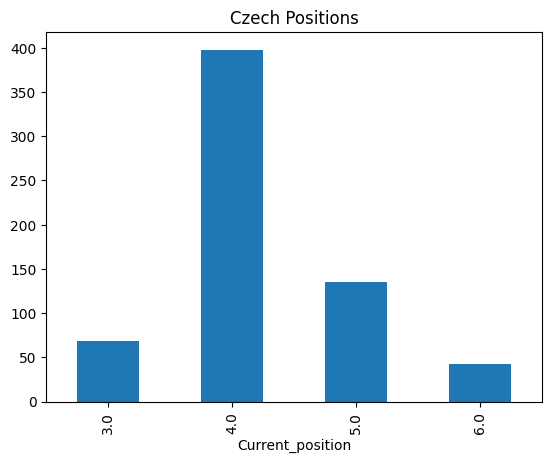

In [27]:
data_cz_formatted_academic['Current_position'].value_counts().sort_index().plot(kind='bar')
plt.title('Czech Positions')

In [28]:
## Creating dummy variables for the categorical variables Current Position, Contract Duration, and Leadership Position:

data_cz_formatted_academic_w_dummies = pd.get_dummies(data_cz_formatted_academic, columns = ['Current_position', 'Contract_duration', 'Leadership_position'], drop_first=True)

# print(data_cz_formatted_academic_w_dummies[data_cz_formatted_academic_w_dummies.isna().any(axis=1)])

data_cz_formatted_academic_w_dummies = data_cz_formatted_academic_w_dummies.dropna().reset_index(drop=True)

data_cz_formatted_academic_w_dummies = data_cz_formatted_academic_w_dummies.astype(float)

Current_position_dummy_cols = [col for col in data_cz_formatted_academic_w_dummies.columns if 'Current_position' in col]
Working_condition_cols = [col for col in data_cz_formatted_academic_w_dummies.columns if col not in ['Job_satisfaction']+['Age']+Current_position_dummy_cols]

## Calculating the interaction terms for Age moderator:
for col in Working_condition_cols:
  data_cz_formatted_academic_w_dummies[col+'_mod_Age'] = data_cz_formatted_academic_w_dummies[col] * data_cz_formatted_academic_w_dummies['Age']

# data_cz_formatted_academic_w_dummies = data_cz_formatted_academic_w_dummies.drop(['Age_mod_Age', 'Job_satisfaction_mod_Age'], axis=1)

data_cz_formatted_academic_w_dummies.to_csv('data_cz_formatted_academic_w_dummies.csv')

print(data_cz_formatted_academic_w_dummies.columns.tolist())
print(np.shape(data_cz_formatted_academic_w_dummies))

['Age', 'Salary', 'Actual_hrs', 'Effort', 'Policy_influence', 'Performance_pressure', 'Teaching_percent', 'Research_percent', 'Academic_Resources', 'Perceived_Autonomy', 'Leadership_quality', 'Sense_of_community', 'Job_satisfaction', 'Current_position_4.0', 'Current_position_5.0', 'Current_position_6.0', 'Contract_duration_2.0', 'Contract_duration_3.0', 'Leadership_position_2.0', 'Leadership_position_3.0', 'Salary_mod_Age', 'Actual_hrs_mod_Age', 'Effort_mod_Age', 'Policy_influence_mod_Age', 'Performance_pressure_mod_Age', 'Teaching_percent_mod_Age', 'Research_percent_mod_Age', 'Academic_Resources_mod_Age', 'Perceived_Autonomy_mod_Age', 'Leadership_quality_mod_Age', 'Sense_of_community_mod_Age', 'Contract_duration_2.0_mod_Age', 'Contract_duration_3.0_mod_Age', 'Leadership_position_2.0_mod_Age', 'Leadership_position_3.0_mod_Age']
(644, 35)


## Correlations and VIF Multicollinearity:

Text(0.5, 1.0, 'CZ Correlation Heatmap')

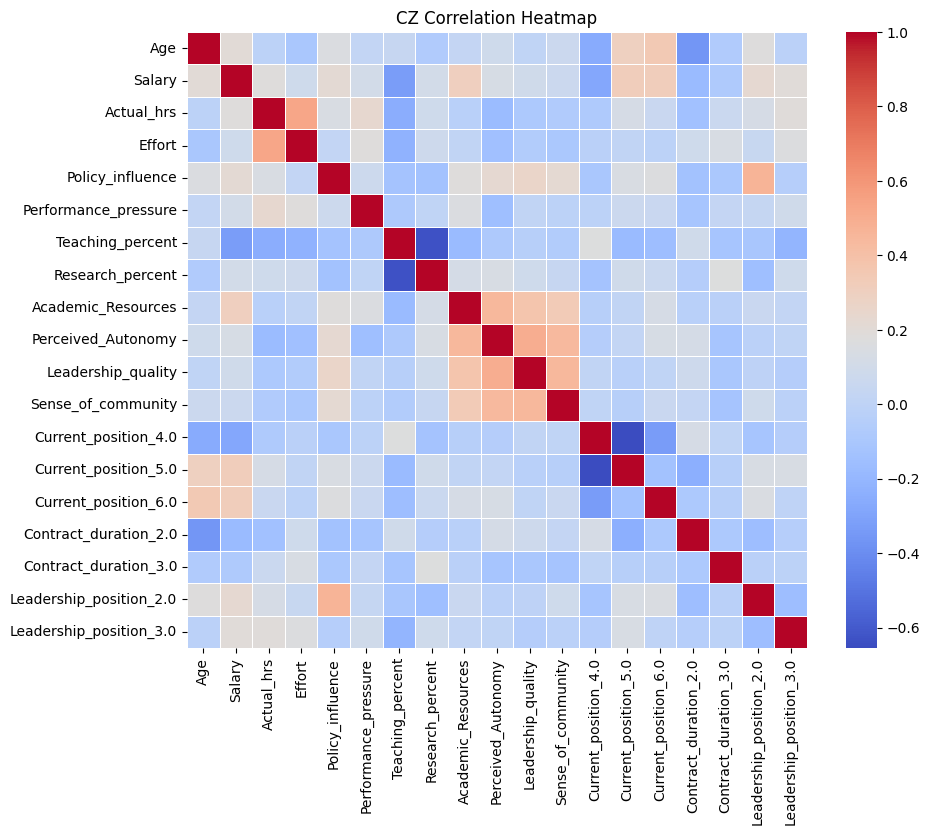

In [29]:
corr_cols = [col for col in data_cz_formatted_academic_w_dummies.columns if 'mod_Age' not in col and 'Job_satisfaction' not in col]
correlations = data_cz_formatted_academic_w_dummies[corr_cols].corr()

plt.figure(figsize=(10, 8)) #, dpi = 600)
sns.heatmap(correlations, annot=False, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('CZ Correlation Heatmap')

In [30]:
## Performing Variance Inflation Factor (VIF) analysis of the dataset:

Current_position_dummy_cols = [col for col in data_cz_formatted_academic_w_dummies.columns if 'Current_position' in col and 'mod_Age' not in col]
## Taking the moderation coefficients separately:
Moderation_cols = [col for col in data_cz_formatted_academic_w_dummies.columns if 'mod_Age' in col]
## Taking the remaining variables for working conditions:
Working_condition_cols = [col for col in data_cz_formatted_academic_w_dummies.columns if col not in ['Job_satisfaction']+['Age']+Current_position_dummy_cols+Moderation_cols]

for cols in [Current_position_dummy_cols, Working_condition_cols, Moderation_cols]:
  if cols == Current_position_dummy_cols:
    print('Current Position:')
  elif cols == Working_condition_cols:
    print('Working Conditions:')
  elif cols == Moderation_cols:
    print('Age-Moderated Working Conditions:')
  X = data_cz_formatted_academic_w_dummies[cols].copy()
  X_const = add_constant(X)
  vif_data = pd.DataFrame()
  vif_data['Variable'] = X_const.columns
  vif_data['VIF'] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

  print(vif_data)
  print('----------------------------------------')

Current Position:
               Variable       VIF
0                 const  9.333333
1  Current_position_4.0  2.585336
2  Current_position_5.0  2.336754
3  Current_position_6.0  1.503781
----------------------------------------
Working Conditions:
                   Variable         VIF
0                     const  126.928667
1                    Salary    1.370917
2                Actual_hrs    1.608499
3                    Effort    1.545914
4          Policy_influence    1.562577
5      Performance_pressure    1.162888
6          Teaching_percent    2.223119
7          Research_percent    2.035960
8        Academic_Resources    1.526548
9        Perceived_Autonomy    1.797752
10       Leadership_quality    1.565451
11       Sense_of_community    1.413377
12    Contract_duration_2.0    1.166967
13    Contract_duration_3.0    1.098772
14  Leadership_position_2.0    1.475186
15  Leadership_position_3.0    1.181846
----------------------------------------
Age-Moderated Working Conditio

## Calculating Cronbach's Alpha for the combined factors:

In [31]:
def Cronbach_alpha_func(data, label):
  col_nr = data.shape[1]

  item_variances = np.var(data, axis=0, ddof=1)
  total_var = np.var(np.sum(data, axis=1), ddof=1)
  alpha_cronbach = (col_nr/(col_nr-1))*(1-(np.sum(item_variances)/total_var))

  print(f'{label} Cronbach Alpha:', alpha_cronbach)
  return alpha_cronbach

In [32]:
## Academic Resources:

data_cz_for_alpha_academic = data_cz_job_w_inversion[(data_cz_job_w_inversion['Current_position'].isin([3., 4., 5., 6.])) &
                                                     (data_cz_job_w_inversion['Contract_duration']<5) &
                                                     (data_cz_job_w_inversion['Leadership_position']<4)].dropna()

values = data_cz_for_alpha_academic['Teaching_hrs']/data_cz_for_alpha_academic[['Teaching_hrs', 'Research_hrs', 'External_funding_hrs', 'Admin_hrs']].sum(axis=1)
data_cz_for_alpha_academic = data_cz_for_alpha_academic.drop(values[values.isna()].index)

print(len(data_cz_for_alpha_academic))

academic_resources_for_alpha = np.asarray(data_cz_for_alpha_academic[['Acad_res_facility', 'Acad_res_equip', 'Acad_res_lit',
                         'Acad_res_support', 'Acad_res_PD', 'Acad_res_funding']])

perceived_autonomy_for_alpha = np.asarray(data_cz_for_alpha_academic[['Be_myself', "Follow_commands", 'Do_differently',
                                                             'Want_to_do', 'Done_best', 'Forced_to_do']])

leadership_quality_for_alpha = np.asarray(data_cz_for_alpha_academic[['Development_opportunities', 'Prioritizes_satisfaction',
                                                             'Work_planning', 'Solving_conflicts']])

sense_of_community_for_alpha = np.asarray(data_cz_for_alpha_academic[['Good_atmosphere', 'Good_cooperation', 'Part_of_community']])

job_satisfaction_for_alpha = np.asarray(data_cz_for_alpha_academic[['Work_prospects', 'Physical_working_conditions',
                                                                      'Use_of_abilities', 'Satisfaction_w_salary',
                                                                      'Overall_satisfaction']])


acad_res_cron_alpha = Cronbach_alpha_func(academic_resources_for_alpha, 'Academic Resources')
perc_auton_cron_alpha = Cronbach_alpha_func(perceived_autonomy_for_alpha, 'Perceived Autonomy')
lead_qual_cron_alpha = Cronbach_alpha_func(leadership_quality_for_alpha, 'Leadership Quality')
sens_comm_cron_alpha = Cronbach_alpha_func(sense_of_community_for_alpha, 'Sense of Community')
print('---------------------')
job_sat_cron_alpha = Cronbach_alpha_func(job_satisfaction_for_alpha, 'Job Satisfaction')





646
Academic Resources Cronbach Alpha: 0.7888050429353173
Perceived Autonomy Cronbach Alpha: 0.867198386661585
Leadership Quality Cronbach Alpha: 0.9167265938085571
Sense of Community Cronbach Alpha: 0.8696816861726325
---------------------
Job Satisfaction Cronbach Alpha: 0.7831586871966213


## Structural Equation Modelling:

We study the relationship between academic position and job satisfaction, mediated by working conditions and moderated by age.

In [33]:
## Taking the response variable (Job satisfaction), the moderator variable (Age), and the predictor variable(s) (Current Position):
Job_satisfaction_col = ['Job_satisfaction']
Age_col = ['Age']
Current_position_dummy_cols = [col for col in data_cz_formatted_academic_w_dummies.columns if 'Current_position' in col and 'mod_Age' not in col]

## Taking the moderation coefficients separately:
Moderation_cols = [col for col in data_cz_formatted_academic_w_dummies.columns if 'mod_Age' in col]

## Taking the remaining variables for working conditions:
Working_condition_cols = [col for col in data_cz_formatted_academic_w_dummies.columns if col not in Job_satisfaction_col+Age_col+Current_position_dummy_cols+Moderation_cols]

Working_condition_cols

['Salary',
 'Actual_hrs',
 'Effort',
 'Policy_influence',
 'Performance_pressure',
 'Teaching_percent',
 'Research_percent',
 'Academic_Resources',
 'Perceived_Autonomy',
 'Leadership_quality',
 'Sense_of_community',
 'Contract_duration_2.0',
 'Contract_duration_3.0',
 'Leadership_position_2.0',
 'Leadership_position_3.0']

In [34]:
Current_position_dummy_cols

['Current_position_4.0', 'Current_position_5.0', 'Current_position_6.0']

In [35]:
Moderation_cols

['Salary_mod_Age',
 'Actual_hrs_mod_Age',
 'Effort_mod_Age',
 'Policy_influence_mod_Age',
 'Performance_pressure_mod_Age',
 'Teaching_percent_mod_Age',
 'Research_percent_mod_Age',
 'Academic_Resources_mod_Age',
 'Perceived_Autonomy_mod_Age',
 'Leadership_quality_mod_Age',
 'Sense_of_community_mod_Age',
 'Contract_duration_2.0_mod_Age',
 'Contract_duration_3.0_mod_Age',
 'Leadership_position_2.0_mod_Age',
 'Leadership_position_3.0_mod_Age']

In [36]:
Current_position_factors = " + ".join(Current_position_dummy_cols)
Working_condition_factors = " + ".join(Working_condition_cols)
Moderation_factors = " + ".join(Moderation_cols)

path_no_mod = f"""
Salary ~ {Current_position_factors}
Actual_hrs ~ {Current_position_factors}
Effort ~ {Current_position_factors}
Policy_influence ~ {Current_position_factors}
Performance_pressure ~ {Current_position_factors}
Teaching_percent ~ {Current_position_factors}
Research_percent ~ {Current_position_factors}
Academic_Resources ~ {Current_position_factors}
Perceived_Autonomy ~ {Current_position_factors}
Leadership_quality ~ {Current_position_factors}
Sense_of_community ~ {Current_position_factors}
Contract_duration_2.0 ~ {Current_position_factors}
Contract_duration_3.0 ~ {Current_position_factors}
Leadership_position_2.0 ~ {Current_position_factors}
Leadership_position_3.0 ~ {Current_position_factors}
Job_satisfaction ~ {Working_condition_factors} + {Current_position_factors}
"""

## Maybe to add Contract_duration_4.0 ~ {Current_position_factors} back?


path = f"""
Salary ~ {Current_position_factors}
Actual_hrs ~ {Current_position_factors}
Effort ~ {Current_position_factors}
Policy_influence ~ {Current_position_factors}
Performance_pressure ~ {Current_position_factors}
Teaching_percent ~ {Current_position_factors}
Research_percent ~ {Current_position_factors}
Academic_Resources ~ {Current_position_factors}
Perceived_Autonomy ~ {Current_position_factors}
Leadership_quality ~ {Current_position_factors}
Sense_of_community ~ {Current_position_factors}
Contract_duration_2.0 ~ {Current_position_factors}
Contract_duration_3.0 ~ {Current_position_factors}
Leadership_position_2.0 ~ {Current_position_factors}
Leadership_position_3.0 ~ {Current_position_factors}
Job_satisfaction ~ {Working_condition_factors} + {Current_position_factors} + {Moderation_factors}
"""

print('Mediation/Moderation Path Model Specification:')
print(path)
print('-----------------------------------')


Mediation/Moderation Path Model Specification:

Salary ~ Current_position_4.0 + Current_position_5.0 + Current_position_6.0
Actual_hrs ~ Current_position_4.0 + Current_position_5.0 + Current_position_6.0
Effort ~ Current_position_4.0 + Current_position_5.0 + Current_position_6.0
Policy_influence ~ Current_position_4.0 + Current_position_5.0 + Current_position_6.0
Performance_pressure ~ Current_position_4.0 + Current_position_5.0 + Current_position_6.0
Teaching_percent ~ Current_position_4.0 + Current_position_5.0 + Current_position_6.0
Research_percent ~ Current_position_4.0 + Current_position_5.0 + Current_position_6.0
Academic_Resources ~ Current_position_4.0 + Current_position_5.0 + Current_position_6.0
Perceived_Autonomy ~ Current_position_4.0 + Current_position_5.0 + Current_position_6.0
Leadership_quality ~ Current_position_4.0 + Current_position_5.0 + Current_position_6.0
Sense_of_community ~ Current_position_4.0 + Current_position_5.0 + Current_position_6.0
Contract_duration_2.

In [37]:
model = semopy.Model(path)
result = model.fit(data_cz_formatted_academic_w_dummies)
print(result)

Name of objective: MLW
Optimization method: SLSQP
Optimization successful.
Optimization terminated successfully
Objective value: 45.792
Number of iterations: 261
Params: 1.618 4.763 6.958 1.947 5.322 4.892 -1.763 -0.756 -1.617 0.436 0.860 1.257 0.320 0.462 0.546 -2.924 -12.752 -17.898 -2.769 2.020 3.108 0.117 0.156 0.495 0.069 0.135 0.521 -0.041 -0.125 -0.023 0.020 -0.056 0.212 -0.220 -0.490 -0.428 -0.026 -0.036 -0.043 0.104 0.238 0.352 0.089 0.186 0.105 0.064 0.001 0.002 -0.135 0.049 -0.007 -0.000 0.288 0.039 -0.039 0.457 -0.268 -0.126 0.293 0.224 -0.065 -0.035 -0.011 -0.000 0.000 -0.000 0.004 -0.001 0.000 -0.000 0.005 0.004 0.003 -0.008 0.007 0.005 -0.006 -0.005 0.542 122.568 0.199 0.017 456.276 0.232 0.131 0.099 1.328 0.720 1.012 1.311 317.071 10.319 0.892 385.374


In [38]:
## Evaluating the model fit:
if 'Optimization terminated successfully' in result.message:
    print('Optimization Successful')
    print('EVALUATION:')
    fit_evaluation = semopy.calc_stats(model)
    print(fit_evaluation.T)
    print('-'*25)

Optimization Successful
EVALUATION:
                      Value
DoF              501.000000
DoF Baseline     579.000000
chi2           29490.111713
chi2 p-value       0.000000
chi2 Baseline  36058.163078
CFI                0.182926
GFI                0.182152
AGFI               0.054822
NFI                0.182152
TLI                0.055717
RMSEA              0.299981
AIC               96.415802
BIC              516.379482
LogLik            45.792099
-------------------------


In [39]:
ins = model.inspect()
print(ins)
ins.to_csv('CZ_Model_Parameter_Values.csv')

                  lval  op                  rval    Estimate   Std. Err  \
0               Salary   ~  Current_position_4.0    1.617511   0.418909   
1               Salary   ~  Current_position_5.0    4.763072   0.475391   
2               Salary   ~  Current_position_6.0    6.957516   0.628694   
3           Actual_hrs   ~  Current_position_4.0    1.947442   1.443713   
4           Actual_hrs   ~  Current_position_5.0    5.322163   1.638370   
..                 ...  ..                   ...         ...        ...   
89    Research_percent  ~~      Research_percent  317.070605  17.669654   
90              Salary  ~~                Salary   10.319406   0.575078   
91  Sense_of_community  ~~    Sense_of_community    0.891509   0.049682   
92    Teaching_percent  ~~      Teaching_percent  385.373775  21.476041   
93    Job_satisfaction  ~~      Job_satisfaction    0.232157   0.012938   

      z-value   p-value  
0    3.861246  0.000113  
1   10.019271  0.000000  
2   11.066609  0.0000

In [40]:
print(ins[ins['p-value']<0.05])

                  lval  op                  rval    Estimate   Std. Err  \
0               Salary   ~  Current_position_4.0    1.617511   0.418909   
1               Salary   ~  Current_position_5.0    4.763072   0.475391   
2               Salary   ~  Current_position_6.0    6.957516   0.628694   
4           Actual_hrs   ~  Current_position_5.0    5.322163   1.638370   
5           Actual_hrs   ~  Current_position_6.0    4.891676   2.166709   
..                 ...  ..                   ...         ...        ...   
89    Research_percent  ~~      Research_percent  317.070605  17.669654   
90              Salary  ~~                Salary   10.319406   0.575078   
91  Sense_of_community  ~~    Sense_of_community    0.891509   0.049682   
92    Teaching_percent  ~~      Teaching_percent  385.373775  21.476041   
93    Job_satisfaction  ~~      Job_satisfaction    0.232157   0.012938   

      z-value   p-value  
0    3.861246  0.000113  
1   10.019271  0.000000  
2   11.066609  0.0000

In [41]:
significance = []

for i in range(len(ins)):
  if ins['p-value'].iloc[i] <= 0.001:
    significance.append('***')
  elif 0.001 < ins['p-value'].iloc[i] <= 0.01:
    significance.append('**')
  elif 0.01 < ins['p-value'].iloc[i] <= 0.05:
    significance.append('*')
  else:
    significance.append(' (n.s.)')

ins['Significance'] = significance

ins['Estimate w Significance'] = round(ins['Estimate'],5).astype(str) + ins['Significance']
ins

,lval,op,rval,Estimate,Std. Err,z-value,p-value,Significance,Estimate w Significance
0,Salary,~,Current_position_4.0,1.617511,0.418909,3.861246,0.000113,***,1.61751***
1,Salary,~,Current_position_5.0,4.763072,0.475391,10.019271,0.000000,***,4.76307***
2,Salary,~,Current_position_6.0,6.957516,0.628694,11.066609,0.000000,***,6.95752***
3,Actual_hrs,~,Current_position_4.0,1.947442,1.443713,1.348913,0.177365,(n.s.),1.94744 (n.s.)
4,Actual_hrs,~,Current_position_5.0,5.322163,1.638370,3.248450,0.001160,**,5.32216**
...,...,...,...,...,...,...,...,...,...
89,Research_percent,~~,Research_percent,317.070605,17.669654,17.944358,0.000000,***,317.0706***
90,Salary,~~,Salary,10.319406,0.575078,17.944358,0.000000,***,10.31941***
91,Sense_of_community,~~,Sense_of_community,0.891509,0.049682,17.944358,0.000000,***,0.89151***
92,Teaching_percent,~~,Teaching_percent,385.373775,21.476041,17.944358,0.000000,***,385.37378***


In [42]:

## Saving the Job Position pathway coefficients for the SEM:
job_pos_paths = pd.DataFrame()
job_pos_paths['lval'] = ins['lval'][ins['rval']==Current_position_dummy_cols[0]]

for curr_pos in Current_position_dummy_cols:
  job_pos_paths = pd.merge(job_pos_paths, ins[['lval', 'Estimate w Significance']][ins['rval']==curr_pos], on='lval', how='left')
  job_pos_paths.rename(columns={job_pos_paths.columns[-1]: curr_pos}, inplace=True)

job_pos_paths


## Saving the Working Conditions pathway coefficients for the SEM:
work_cond_paths = pd.DataFrame()
work_cond_paths['lval'] = [ins['lval'][ins['rval']==Working_condition_cols[0]].iloc[0]]

for work_cond in Working_condition_cols:
  work_cond_paths = pd.merge(work_cond_paths, ins[['lval', 'Estimate w Significance']][ins['rval']==work_cond], on='lval', how='left')
  work_cond_paths.rename(columns={work_cond_paths.columns[-1]: work_cond}, inplace=True)

work_cond_paths


# ## Saving the moderator pathway coefficients for the SEM:
mod_age_paths = pd.DataFrame()
mod_age_paths['lval'] = [ins['lval'][ins['rval']==Moderation_cols[0]].iloc[0]]

for mod_age in Moderation_cols:
  mod_age_paths = pd.merge(mod_age_paths, ins[['lval', 'Estimate w Significance']][ins['rval']==mod_age], on='lval', how='left')
  mod_age_paths.rename(columns={mod_age_paths.columns[-1]: mod_age}, inplace=True)


job_pos_paths.set_index('lval')



,Current_position_4.0,Current_position_5.0,Current_position_6.0
lval,,,
Salary,1.61751***,4.76307***,6.95752***
Actual_hrs,1.94744 (n.s.),5.32216**,4.89168*
Effort,-1.76261 (n.s.),-0.75646 (n.s.),-1.61694 (n.s.)
Policy_influence,0.43586**,0.85984***,1.25658***
Performance_pressure,0.32022*,0.46244**,0.54566**
Teaching_percent,-2.92413 (n.s.),-12.75245***,-17.89795***
Research_percent,-2.7695 (n.s.),2.02026 (n.s.),3.10752 (n.s.)
Academic_Resources,0.11699 (n.s.),0.15551 (n.s.),0.49497***
Perceived_Autonomy,0.0693 (n.s.),0.13461 (n.s.),0.52057**


In [43]:
work_cond_paths.set_index('lval').T

lval,Job_satisfaction
Salary,0.06443***
Actual_hrs,0.00093 (n.s.)
Effort,0.00217*
Policy_influence,-0.13487***
Performance_pressure,0.04865**
Teaching_percent,-0.00659***
Research_percent,-0.00047 (n.s.)
Academic_Resources,0.28806***
Perceived_Autonomy,0.03914 (n.s.)
Leadership_quality,-0.03862*


In [44]:
mod_age_paths.set_index('lval').T

lval,Job_satisfaction
Salary_mod_Age,-0.00046**
Actual_hrs_mod_Age,5e-05 (n.s.)
Effort_mod_Age,-8e-05***
Policy_influence_mod_Age,0.00371***
Performance_pressure_mod_Age,-0.00062 (n.s.)
Teaching_percent_mod_Age,0.00015***
Research_percent_mod_Age,-3e-05 (n.s.)
Academic_Resources_mod_Age,0.00452***
Perceived_Autonomy_mod_Age,0.00405***
Leadership_quality_mod_Age,0.00251***


In [45]:
med_mod_path_values = pd.DataFrame(columns = ['Current_position']+Working_condition_cols)

for curr_pos in Current_position_dummy_cols:
  path_coeff = [curr_pos]
  for work_cond in Working_condition_cols:
    path_coeff.append(float(ins['Estimate'][(ins['rval']==curr_pos) &
                      (ins['lval']==work_cond)].iloc[0]) * float(ins['Estimate'][(ins['rval']==work_cond) &
                       (ins['lval']=='Job_satisfaction')].iloc[0]))
  med_mod_path_values.loc[len(med_mod_path_values)] = path_coeff
med_mod_path_values

,Current_position,Salary,Actual_hrs,Effort,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Leadership_quality,Sense_of_community,Contract_duration_2.0,Contract_duration_3.0,Leadership_position_2.0,Leadership_position_3.0
0,Current_position_4.0,0.104215,0.001806,-0.003817,-0.058786,0.015580,0.019267,0.001306,0.033702,0.002712,0.001573,0.009305,0.058880,0.003275,0.030483,0.019863
1,Current_position_5.0,0.306880,0.004935,-0.001638,-0.115970,0.022500,0.084024,-0.000952,0.044796,0.005269,0.004809,-0.025577,0.131373,0.004562,0.069552,0.041619
2,Current_position_6.0,0.448265,0.004536,-0.003501,-0.169480,0.026549,0.117926,-0.001465,0.142583,0.020376,0.000907,0.096610,0.114509,0.005499,0.102995,0.023460


## Performing Sobel Test for mediation effects:

In [46]:
Sobel_z_stat_df  = pd.DataFrame(columns = ['Current_Position'] + Working_condition_cols)
Sobel_p_val_df  = pd.DataFrame(columns = ['Current_Position'] + Working_condition_cols)

for curr_pos in Current_position_dummy_cols:
  Sobel_z = [curr_pos]
  Sobel_p = [curr_pos]
  for work_cond in Working_condition_cols:
    JP_WC_mean = float(ins['Estimate'][(ins['rval']==curr_pos) & (ins['lval']==work_cond)].iloc[0])  ## The coefficient between Job Position and Working Condition
    JP_WC_std = float(ins['Std. Err'][(ins['rval']==curr_pos) & (ins['lval']==work_cond)].iloc[0])  ## The coeff standard deviation between Job Position and Working Condition
    WC_JS_mean = float(ins['Estimate'][(ins['rval']==work_cond) & (ins['lval']=='Job_satisfaction')].iloc[0]) ## The coefficient between Working Condition and Job Satisfaction
    WC_JS_std = float(ins['Std. Err'][(ins['rval']==work_cond) & (ins['lval']=='Job_satisfaction')].iloc[0]) ## The coeff standard deviation between Working Condition and Job Satisfaction
    ## Calculating Sobel Z-value statistic:
    z_value = (JP_WC_mean*WC_JS_mean)/np.sqrt(JP_WC_mean**2 * WC_JS_std**2 + WC_JS_mean**2 * JP_WC_std**2)

    ## Calculating two-tailed Sobel p-value:
    p_value_two_tailed = 2 * norm.sf(abs(z_value))

    if p_value_two_tailed<=0.001:
      sig = '***'
    elif p_value_two_tailed <= 0.01:
      sig = '**'
    elif p_value_two_tailed <= 0.05:
      sig = '*'
    else:
      sig = ' (n.s.)'
    Sobel_z.append(round(z_value,4).astype(str)+sig)
    Sobel_p.append(p_value_two_tailed)

  Sobel_z_stat_df.loc[len(Sobel_z_stat_df)] = Sobel_z
  Sobel_p_val_df.loc[len(Sobel_p_val_df)] = Sobel_p

Sobel_z_stat_df


,Current_Position,Salary,Actual_hrs,Effort,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Leadership_quality,Sense_of_community,Contract_duration_2.0,Contract_duration_3.0,Leadership_position_2.0,Leadership_position_3.0
0,Current_position_4.0,3.6397***,0.5019 (n.s.),-0.6125 (n.s.),-2.7474**,1.7725 (n.s.),1.1265 (n.s.),0.4146 (n.s.),1.2112 (n.s.),0.5898 (n.s.),0.2692 (n.s.),0.1655 (n.s.),3.2392**,0.7507 (n.s.),2.0538*,1.8662 (n.s.)
1,Current_position_5.0,7.3767***,0.5333 (n.s.),-0.2382 (n.s.),-4.3052***,1.9837*,3.6899***,-0.383 (n.s.),1.4156 (n.s.),0.9141 (n.s.),0.697 (n.s.),-0.4008 (n.s.),4.8022***,0.7827 (n.s.),3.4735***,2.7182**
2,Current_position_6.0,7.766***,0.5258 (n.s.),-0.382 (n.s.),-4.6166***,1.8876 (n.s.),3.8454***,-0.3961 (n.s.),3.283**,1.5273 (n.s.),0.104 (n.s.),1.1433 (n.s.),3.8644***,0.7694 (n.s.),3.7108***,1.5446 (n.s.)


In [47]:
Sobel_z_stat_df.set_index('Current_Position').T

Current_Position,Current_position_4.0,Current_position_5.0,Current_position_6.0
Salary,3.6397***,7.3767***,7.766***
Actual_hrs,0.5019 (n.s.),0.5333 (n.s.),0.5258 (n.s.)
Effort,-0.6125 (n.s.),-0.2382 (n.s.),-0.382 (n.s.)
Policy_influence,-2.7474**,-4.3052***,-4.6166***
Performance_pressure,1.7725 (n.s.),1.9837*,1.8876 (n.s.)
Teaching_percent,1.1265 (n.s.),3.6899***,3.8454***
Research_percent,0.4146 (n.s.),-0.383 (n.s.),-0.3961 (n.s.)
Academic_Resources,1.2112 (n.s.),1.4156 (n.s.),3.283**
Perceived_Autonomy,0.5898 (n.s.),0.9141 (n.s.),1.5273 (n.s.)
Leadership_quality,0.2692 (n.s.),0.697 (n.s.),0.104 (n.s.)


In [48]:
Sobel_p_val_df.set_index('Current_Position').T

Current_Position,Current_position_4.0,Current_position_5.0,Current_position_6.0
Salary,0.000273,1.622600e-13,8.099752e-15
Actual_hrs,0.615770,5.938062e-01,5.990288e-01
Effort,0.540239,8.117607e-01,7.024624e-01
Policy_influence,0.006006,1.668388e-05,3.900401e-06
Performance_pressure,0.076316,4.728825e-02,5.908131e-02
Teaching_percent,0.259942,2.243003e-04,1.203526e-04
Research_percent,0.678468,7.017209e-01,6.920270e-01
Academic_Resources,0.225815,1.569070e-01,1.027026e-03
Perceived_Autonomy,0.555350,3.606410e-01,1.266895e-01
Leadership_quality,0.787798,4.858056e-01,9.171824e-01


## Sobel test for moderation effects:

In [49]:
Sobel_z_mod_df  = pd.DataFrame(columns = ['Current_Position'] + Working_condition_cols)
Sobel_p_mod_df  = pd.DataFrame(columns = ['Current_Position'] + Working_condition_cols)

for curr_pos in Current_position_dummy_cols:
  Sobel_z = [curr_pos]
  Sobel_p = [curr_pos]
  for work_cond in Working_condition_cols:
    JP_WC_mean = float(ins['Estimate'][(ins['rval']==curr_pos) & (ins['lval']==work_cond)].iloc[0])  ## The coefficient between Job Position and Working Condition
    JP_WC_std = float(ins['Std. Err'][(ins['rval']==curr_pos) & (ins['lval']==work_cond)].iloc[0])  ## The coeff standard deviation between Job Position and Working Condition
    WC_JS_mean = float(ins['Estimate'][(ins['rval']==work_cond+'_mod_Age') & (ins['lval']=='Job_satisfaction')].iloc[0]) ## The coefficient between Working Condition and Job Satisfaction
    WC_JS_std = float(ins['Std. Err'][(ins['rval']==work_cond+'_mod_Age') & (ins['lval']=='Job_satisfaction')].iloc[0]) ## The coeff standard deviation between Working Condition and Job Satisfaction
    ## Calculating Sobel Z-value statistic:
    z_value = (JP_WC_mean*WC_JS_mean)/np.sqrt(JP_WC_mean**2 * WC_JS_std**2 + WC_JS_mean**2 * JP_WC_std**2)

    ## Calculating two-tailed Sobel p-value:
    p_value_two_tailed = 2 * norm.sf(abs(z_value))

    if p_value_two_tailed<=0.001:
      sig = '***'
    elif p_value_two_tailed <= 0.01:
      sig = '**'
    elif p_value_two_tailed <= 0.05:
      sig = '*'
    else:
      sig = ' (n.s.)'
    Sobel_z.append(round(z_value,4).astype(str)+sig)
    Sobel_p.append(p_value_two_tailed)

  Sobel_z_mod_df.loc[len(Sobel_z_mod_df)] = Sobel_z
  Sobel_p_mod_df.loc[len(Sobel_p_mod_df)] = Sobel_p

Sobel_z_mod_df

,Current_Position,Salary,Actual_hrs,Effort,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Leadership_quality,Sense_of_community,Contract_duration_2.0,Contract_duration_3.0,Leadership_position_2.0,Leadership_position_3.0
0,Current_position_4.0,-2.4981*,0.8162 (n.s.),0.6234 (n.s.),2.7573**,-1.2226 (n.s.),-1.1218 (n.s.),0.7499 (n.s.),1.198 (n.s.),0.6234 (n.s.),-0.2706 (n.s.),-0.1655 (n.s.),-3.3021***,-0.9837 (n.s.),-2.0041*,-1.8551 (n.s.)
1,Current_position_5.0,-3.1138**,0.9777 (n.s.),0.2388 (n.s.),4.3436***,-1.2858 (n.s.),-3.5331***,-0.6001 (n.s.),1.3946 (n.s.),1.0572 (n.s.),-0.7236 (n.s.),0.4007 (n.s.),-5.0145***,-1.0594 (n.s.),-3.248**,-2.6842**
2,Current_position_6.0,-3.1413**,0.9335 (n.s.),0.3846 (n.s.),4.6641***,-1.2585 (n.s.),-3.6688***,-0.6547 (n.s.),3.0446**,2.8093**,-0.1041 (n.s.),-1.1419 (n.s.),-3.9724***,-1.0269 (n.s.),-3.4395***,-1.5383 (n.s.)


In [50]:
Sobel_z_mod_df.set_index('Current_Position').T

Current_Position,Current_position_4.0,Current_position_5.0,Current_position_6.0
Salary,-2.4981*,-3.1138**,-3.1413**
Actual_hrs,0.8162 (n.s.),0.9777 (n.s.),0.9335 (n.s.)
Effort,0.6234 (n.s.),0.2388 (n.s.),0.3846 (n.s.)
Policy_influence,2.7573**,4.3436***,4.6641***
Performance_pressure,-1.2226 (n.s.),-1.2858 (n.s.),-1.2585 (n.s.)
Teaching_percent,-1.1218 (n.s.),-3.5331***,-3.6688***
Research_percent,0.7499 (n.s.),-0.6001 (n.s.),-0.6547 (n.s.)
Academic_Resources,1.198 (n.s.),1.3946 (n.s.),3.0446**
Perceived_Autonomy,0.6234 (n.s.),1.0572 (n.s.),2.8093**
Leadership_quality,-0.2706 (n.s.),-0.7236 (n.s.),-0.1041 (n.s.)


In [51]:
Sobel_p_mod_df.set_index('Current_Position').T

Current_Position,Current_position_4.0,Current_position_5.0,Current_position_6.0
Salary,0.012488,1.846951e-03,0.001682
Actual_hrs,0.414367,3.282264e-01,0.350569
Effort,0.533008,8.112717e-01,0.700521
Policy_influence,0.005827,1.401504e-05,0.000003
Performance_pressure,0.221497,1.985186e-01,0.208222
Teaching_percent,0.261950,4.107820e-04,0.000244
Research_percent,0.453307,5.484178e-01,0.512647
Academic_Resources,0.230911,1.631327e-01,0.002330
Perceived_Autonomy,0.533014,2.904053e-01,0.004965
Leadership_quality,0.786674,4.693134e-01,0.917116


## Path Modelling (No Moderation):

In [52]:
## Path Modelling with no age moderation:
model_no_mod = semopy.Model(path_no_mod)
result_no_mod = model_no_mod.fit(data_cz_formatted_academic_w_dummies)
print(result_no_mod)

Name of objective: MLW
Optimization method: SLSQP
Optimization successful.
Optimization terminated successfully
Objective value: 3.043
Number of iterations: 220
Params: 1.618 4.763 6.958 1.947 5.320 4.895 -1.751 -0.736 -1.546 0.436 0.860 1.257 0.320 0.462 0.546 -2.915 -12.755 -17.890 -2.757 2.044 3.131 0.117 0.155 0.495 0.069 0.135 0.521 -0.041 -0.125 -0.023 0.020 -0.056 0.212 -0.220 -0.490 -0.428 -0.026 -0.036 -0.043 0.104 0.238 0.352 0.089 0.185 0.105 0.042 0.002 -0.001 0.024 0.017 -0.000 -0.002 0.479 0.221 0.077 0.095 0.005 0.111 0.035 -0.002 -0.012 0.057 0.127 0.542 122.576 0.199 0.017 456.201 0.245 0.131 0.099 1.328 0.720 1.012 1.311 317.081 10.319 0.892 385.383


In [53]:
if 'Optimization terminated successfully' in result_no_mod.message:
    print('Optimization Successful')
    print('EVALUATION:')
    fit_evaluation_no_mod = semopy.calc_stats(model_no_mod)
    print(fit_evaluation_no_mod.T)
    print('-'*25)

Optimization Successful
EVALUATION:
                     Value
DoF             111.000000
DoF Baseline    174.000000
chi2           1959.684538
chi2 p-value      0.000000
chi2 Baseline  3688.910987
CFI               0.474045
GFI               0.468763
AGFI              0.167251
NFI               0.468763
TLI               0.175530
RMSEA             0.160940
AIC             151.914023
BIC             504.862223
LogLik            3.042988
-------------------------


In [54]:
ins_no_mod = model_no_mod.inspect()
print(ins_no_mod)
ins_no_mod.to_csv('CZ_No_Mod_Model_Parameter_Values.csv')

                  lval  op                  rval    Estimate   Std. Err  \
0               Salary   ~  Current_position_4.0    1.617609   0.418898   
1               Salary   ~  Current_position_5.0    4.763174   0.475379   
2               Salary   ~  Current_position_6.0    6.958149   0.628678   
3           Actual_hrs   ~  Current_position_4.0    1.946937   1.443760   
4           Actual_hrs   ~  Current_position_5.0    5.320404   1.638424   
..                 ...  ..                   ...         ...        ...   
74    Research_percent  ~~      Research_percent  317.081045  17.670236   
75              Salary  ~~                Salary   10.318873   0.575048   
76  Sense_of_community  ~~    Sense_of_community    0.891538   0.049683   
77    Teaching_percent  ~~      Teaching_percent  385.383004  21.476555   
78    Job_satisfaction  ~~      Job_satisfaction    0.244743   0.013639   

      z-value   p-value  
0    3.861580  0.000113  
1   10.019746  0.000000  
2   11.067902  0.0000

## Sobel Test for Mediation Effect (No Moderation)

In [55]:
Sobel_z_stat_no_mod  = pd.DataFrame(columns = ['Current_Position'] + Working_condition_cols)
Sobel_p_val_no_mod  = pd.DataFrame(columns = ['Current_Position'] + Working_condition_cols)

for curr_pos in Current_position_dummy_cols:
  Sobel_z = [curr_pos]
  Sobel_p = [curr_pos]
  for work_cond in Working_condition_cols:
    JP_WC_mean = float(ins_no_mod['Estimate'][(ins_no_mod['rval']==curr_pos) & (ins_no_mod['lval']==work_cond)].iloc[0])  ## The coefficient between Job Position and Working Condition
    JP_WC_std = float(ins_no_mod['Std. Err'][(ins_no_mod['rval']==curr_pos) & (ins_no_mod['lval']==work_cond)].iloc[0])  ## The coeff standard deviation between Job Position and Working Condition
    WC_JS_mean = float(ins_no_mod['Estimate'][(ins_no_mod['rval']==work_cond) & (ins_no_mod['lval']=='Job_satisfaction')].iloc[0]) ## The coefficient between Working Condition and Job Satisfaction
    WC_JS_std = float(ins_no_mod['Std. Err'][(ins_no_mod['rval']==work_cond) & (ins_no_mod['lval']=='Job_satisfaction')].iloc[0]) ## The coeff standard deviation between Working Condition and Job Satisfaction
    ## Calculating Sobel Z-value statistic:
    z_value = (JP_WC_mean*WC_JS_mean)/np.sqrt(JP_WC_mean**2 * WC_JS_std**2 + WC_JS_mean**2 * JP_WC_std**2)

    ## Calculating two-tailed Sobel p-value:
    p_value_two_tailed = 2 * norm.sf(abs(z_value))

    if p_value_two_tailed<=0.001:
      sig = '***'
    elif p_value_two_tailed <= 0.01:
      sig = '**'
    elif p_value_two_tailed <= 0.05:
      sig = '*'
    else:
      sig = ' (n.s.)'
    Sobel_z.append(round(z_value,4).astype(str)+sig)
    Sobel_p.append(p_value_two_tailed)

  Sobel_z_stat_no_mod.loc[len(Sobel_z_stat_no_mod)] = Sobel_z
  Sobel_p_val_no_mod.loc[len(Sobel_p_val_no_mod)] = Sobel_p

Sobel_z_stat_no_mod

,Current_Position,Salary,Actual_hrs,Effort,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Leadership_quality,Sense_of_community,Contract_duration_2.0,Contract_duration_3.0,Leadership_position_2.0,Leadership_position_3.0
0,Current_position_4.0,3.3813***,0.9661 (n.s.),0.571 (n.s.),1.2711 (n.s.),0.8409 (n.s.),0.1093 (n.s.),1.0426 (n.s.),1.2149 (n.s.),0.6251 (n.s.),-0.2706 (n.s.),0.1651 (n.s.),-0.1175 (n.s.),-0.6656 (n.s.),0.6198 (n.s.),-0.0324 (n.s.)
1,Current_position_5.0,5.7389***,1.2738 (n.s.),0.2297 (n.s.),1.3603 (n.s.),0.8606 (n.s.),0.1097 (n.s.),-0.7308 (n.s.),1.4218 (n.s.),1.0657 (n.s.),-0.7211 (n.s.),-0.3996 (n.s.),-0.1175 (n.s.),-0.6876 (n.s.),0.639 (n.s.),-0.0324 (n.s.)
2,Current_position_6.0,5.9167***,1.1806 (n.s.),0.3571 (n.s.),1.3692 (n.s.),0.8523 (n.s.),0.1097 (n.s.),-0.8307 (n.s.),3.3743***,2.9807**,-0.1041 (n.s.),1.1109 (n.s.),-0.1175 (n.s.),-0.6785 (n.s.),0.6403 (n.s.),-0.0324 (n.s.)


In [56]:
Sobel_z_stat_no_mod.set_index('Current_Position').T

Current_Position,Current_position_4.0,Current_position_5.0,Current_position_6.0
Salary,3.3813***,5.7389***,5.9167***
Actual_hrs,0.9661 (n.s.),1.2738 (n.s.),1.1806 (n.s.)
Effort,0.571 (n.s.),0.2297 (n.s.),0.3571 (n.s.)
Policy_influence,1.2711 (n.s.),1.3603 (n.s.),1.3692 (n.s.)
Performance_pressure,0.8409 (n.s.),0.8606 (n.s.),0.8523 (n.s.)
Teaching_percent,0.1093 (n.s.),0.1097 (n.s.),0.1097 (n.s.)
Research_percent,1.0426 (n.s.),-0.7308 (n.s.),-0.8307 (n.s.)
Academic_Resources,1.2149 (n.s.),1.4218 (n.s.),3.3743***
Perceived_Autonomy,0.6251 (n.s.),1.0657 (n.s.),2.9807**
Leadership_quality,-0.2706 (n.s.),-0.7211 (n.s.),-0.1041 (n.s.)


In [57]:
Sobel_p_val_no_mod.set_index('Current_Position').T

Current_Position,Current_position_4.0,Current_position_5.0,Current_position_6.0
Salary,0.000721,9.529622e-09,3.285099e-09
Actual_hrs,0.333985,2.027323e-01,2.377591e-01
Effort,0.568020,8.183470e-01,7.210318e-01
Policy_influence,0.203690,1.737290e-01,1.709227e-01
Performance_pressure,0.400425,3.894502e-01,3.940684e-01
Teaching_percent,0.912989,9.126146e-01,9.126116e-01
Research_percent,0.297147,4.649281e-01,4.061680e-01
Academic_Resources,0.224385,1.550730e-01,7.400833e-04
Perceived_Autonomy,0.531883,2.865438e-01,2.875499e-03
Leadership_quality,0.786681,4.708427e-01,9.170642e-01


## Bootstrapping:

In [86]:
times = 2000

Evaluation_cols = ['DoF', 'DoF Baseline', 'chi2', 'chi2 p-value', 'chi2 Baseline', 'CFI',
                   'GFI', 'AGFI', 'NFI', 'TLI', 'RMSEA', 'AIC', 'BIC', 'LogLik']


mediation_path_values = pd.DataFrame(columns = ['Bootstrap_nr', 'Current_position']+Working_condition_cols+['Job_satisfaction']+Evaluation_cols)
moderation_path_values = pd.DataFrame(columns = ['Bootstrap_nr', 'Current_position']+Working_condition_cols)
mediation_path_values_no_mod = pd.DataFrame(columns = ['Bootstrap_nr', 'Current_position']+Working_condition_cols+['Job_satisfaction']+Evaluation_cols)

model = semopy.Model(path)
model_no_mod = semopy.Model(path_no_mod)

for i in range(times):
  if i % 20 ==0:
    print(f'Run: {i}/{times}')
  data_cz_bootstrapped = data_cz_formatted_academic_w_dummies.sample(n=len(data_cz_formatted_academic_w_dummies), replace=True, random_state=i).reset_index(drop=True)

  # model = semopy.Model(path)
  result = model.fit(data_cz_bootstrapped)
  ins = model.inspect()
  # model_no_mod = semopy.Model(path_no_mod)
  result_no_mod = model_no_mod.fit(data_cz_bootstrapped)
  ins_no_mod = model_no_mod.inspect()

  if 'Optimization terminated successfully' in result.message and 'Optimization terminated successfully' in result_no_mod.message:
    # print('Optimization Successful')

    ## ---------------- Returning the full indirect path fits for the path model with Age moderation: ----------------------
    fit_evaluation = semopy.calc_stats(model)
    # print('EVALUATION (Chi2 p-value):', float(fit_evaluation['chi2 p-value'].iloc[0]))

    for curr_pos in Current_position_dummy_cols:
      path_coeff = [i, curr_pos]
      mod_coeff = [i, curr_pos]
      for work_cond in Working_condition_cols:
        path_coeff.append(float(ins['Estimate'][(ins['rval']==curr_pos) &
                          (ins['lval']==work_cond)].iloc[0]) * float(ins['Estimate'][(ins['rval']==work_cond) &
                          (ins['lval']=='Job_satisfaction')].iloc[0]))
        mod_coeff.append(float(ins['Estimate'][(ins['rval']==curr_pos) &
                          (ins['lval']==work_cond)].iloc[0]) * float(ins['Estimate'][(ins['rval']==work_cond+'_mod_Age') &
                          (ins['lval']=='Job_satisfaction')].iloc[0]))
      path_coeff.append(float(ins['Estimate'][(ins['rval']==curr_pos) &
                          (ins['lval']=='Job_satisfaction')].iloc[0]))
      path_coeff = path_coeff + fit_evaluation.iloc[0].tolist()
      mediation_path_values.loc[len(mediation_path_values)] = path_coeff
      moderation_path_values.loc[len(moderation_path_values)] = mod_coeff


    ## ---------------- Returning the full indirect path fits for the path model without Age moderation: ----------------------
    fit_evaluation_no_mod = semopy.calc_stats(model_no_mod)
    # print('EVALUATION NO MOD (Chi2 p-value):', float(fit_evaluation_no_mod['chi2 p-value'].iloc[0]))

    for curr_pos in Current_position_dummy_cols:
      path_coeff_no_mod = [i, curr_pos]
      for work_cond in Working_condition_cols:
        path_coeff_no_mod.append(float(ins_no_mod['Estimate'][(ins_no_mod['rval']==curr_pos) &
                          (ins_no_mod['lval']==work_cond)].iloc[0]) * float(ins_no_mod['Estimate'][(ins_no_mod['rval']==work_cond) &
                          (ins_no_mod['lval']=='Job_satisfaction')].iloc[0]))
      path_coeff_no_mod.append(float(ins_no_mod['Estimate'][(ins_no_mod['rval']==curr_pos) &
                          (ins_no_mod['lval']=='Job_satisfaction')].iloc[0]))
      path_coeff_no_mod = path_coeff_no_mod + fit_evaluation_no_mod.iloc[0].tolist()
      mediation_path_values_no_mod.loc[len(mediation_path_values_no_mod)] = path_coeff_no_mod

  else:
    print('Run:', i)
    print('Optimization Unsuccessful')

mediation_path_values

Run: 0/2000
Run: 20/2000
Run: 40/2000
Run: 60/2000
Run: 80/2000
Run: 100/2000
Run: 120/2000
Run: 140/2000
Run: 160/2000
Run: 180/2000
Run: 200/2000
Run: 220/2000
Run: 240/2000
Run: 260/2000
Run: 280/2000
Run: 300/2000
Run: 320/2000
Run: 340/2000
Run: 360/2000
Run: 380/2000
Run: 400/2000
Run: 420/2000
Run: 440/2000
Run: 460/2000
Run: 480/2000
Run: 500/2000
Run: 520/2000
Run: 540/2000
Run: 560/2000
Run: 580/2000
Run: 600/2000
Run: 620/2000
Run: 640/2000
Run: 660/2000
Run: 680/2000
Run: 700/2000
Run: 720/2000
Run: 740/2000
Run: 760/2000
Run: 780/2000
Run: 800/2000
Run: 820/2000
Run: 840/2000
Run: 860/2000
Run: 880/2000
Run: 900/2000
Run: 920/2000
Run: 940/2000
Run: 960/2000
Run: 980/2000
Run: 1000/2000
Run: 1020/2000
Run: 1040/2000
Run: 1060/2000
Run: 1080/2000
Run: 1100/2000
Run: 1120/2000
Run: 1140/2000
Run: 1160/2000
Run: 1180/2000
Run: 1200/2000
Run: 1220/2000
Run: 1240/2000
Run: 1260/2000
Run: 1280/2000
Run: 1300/2000
Run: 1320/2000
Run: 1340/2000
Run: 1360/2000
Run: 1380/2000
Run: 1

,Bootstrap_nr,Current_position,Salary,Actual_hrs,Effort,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,...,chi2 Baseline,CFI,GFI,AGFI,NFI,TLI,RMSEA,AIC,BIC,LogLik
0,0,Current_position_4.0,0.080234,-0.006256,-0.001784,-0.048967,0.024910,-0.020611,-0.026603,-0.001903,...,38216.463601,0.187646,0.186844,0.060244,0.186844,0.061171,0.308077,91.490801,511.454482,48.254599
1,0,Current_position_5.0,0.322915,-0.016963,-0.001090,-0.128284,0.020719,0.045594,-0.005211,-0.000634,...,38216.463601,0.187646,0.186844,0.060244,0.186844,0.061171,0.308077,91.490801,511.454482,48.254599
2,0,Current_position_6.0,0.492765,-0.017986,-0.002038,-0.188189,0.047495,0.110352,-0.008498,-0.007765,...,38216.463601,0.187646,0.186844,0.060244,0.186844,0.061171,0.308077,91.490801,511.454482,48.254599
3,1,Current_position_4.0,0.155666,-0.001484,0.000119,-0.086423,0.027137,-0.000828,-0.000502,0.004701,...,37018.943759,0.164942,0.164469,0.034387,0.164469,0.034933,0.307343,91.942659,511.906340,48.028670
4,1,Current_position_5.0,0.530571,-0.005055,0.000209,-0.181106,0.047007,-0.003867,0.000489,0.031332,...,37018.943759,0.164942,0.164469,0.034387,0.164469,0.034933,0.307343,91.942659,511.906340,48.028670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,1998,Current_position_5.0,-0.052314,0.026855,-0.022918,-0.333970,0.077392,0.075863,0.013291,0.011486,...,38012.395963,0.185769,0.184991,0.058103,0.184991,0.059002,0.307595,91.787444,511.751124,48.106278
5996,1998,Current_position_6.0,-0.079281,0.022187,-0.025330,-0.436090,0.110599,0.099807,0.006889,0.024154,...,38012.395963,0.185769,0.184991,0.058103,0.184991,0.059002,0.307595,91.787444,511.751124,48.106278
5997,1999,Current_position_4.0,-0.026183,-0.013186,-0.023212,-0.009843,0.027779,0.001901,-0.003466,0.044677,...,37102.932010,0.159508,0.159122,0.028206,0.159122,0.028654,0.308696,91.108526,511.072206,48.445737
5998,1999,Current_position_5.0,-0.066428,-0.028831,-0.018514,-0.020450,0.026665,0.071639,-0.000758,0.052443,...,37102.932010,0.159508,0.159122,0.028206,0.159122,0.028654,0.308696,91.108526,511.072206,48.445737


In [87]:
moderation_path_values

,Bootstrap_nr,Current_position,Salary,Actual_hrs,Effort,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Leadership_quality,Sense_of_community,Contract_duration_2.0,Contract_duration_3.0,Leadership_position_2.0,Leadership_position_3.0
0,0,Current_position_4.0,-0.000735,0.000377,0.000136,0.001660,-0.000436,0.000656,0.000285,0.001891,0.000325,0.000534,0.000760,0.001899,0.000149,-0.001431,-0.001778
1,0,Current_position_5.0,-0.002959,0.001022,0.000083,0.004349,-0.000362,-0.001451,0.000056,0.000630,0.000324,0.002036,0.001298,0.004159,-0.000092,-0.004418,-0.002188
2,0,Current_position_6.0,-0.004515,0.001083,0.000155,0.006380,-0.000831,-0.003512,0.000091,0.007715,0.002817,0.000554,-0.002894,0.003872,0.000179,-0.006286,-0.002984
3,1,Current_position_4.0,-0.001689,0.000124,0.000023,0.002584,-0.000411,0.000138,0.000105,0.000086,0.001515,0.000068,-0.000433,-0.000266,-0.000145,-0.000565,-0.001007
4,1,Current_position_5.0,-0.005756,0.000423,0.000041,0.005416,-0.000712,0.000647,-0.000103,0.000574,0.001604,0.000321,-0.000880,-0.003608,-0.000214,-0.001626,-0.001489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,1998,Current_position_5.0,0.004585,-0.000430,0.000539,0.008540,-0.001361,-0.001466,0.000012,0.004048,-0.000657,0.000345,-0.000217,-0.006010,-0.000424,-0.002863,-0.000863
5996,1998,Current_position_6.0,0.006949,-0.000355,0.000596,0.011152,-0.001944,-0.001929,0.000006,0.008512,-0.004297,0.002918,-0.002589,-0.004824,-0.000489,-0.003129,-0.000526
5997,1999,Current_position_4.0,0.001462,0.000356,0.000600,0.000345,-0.000465,-0.000032,0.000253,0.000758,-0.000038,-0.000212,-0.000825,-0.001140,-0.004479,-0.001687,-0.001229
5998,1999,Current_position_5.0,0.003709,0.000778,0.000479,0.000718,-0.000446,-0.001219,0.000055,0.000890,0.000411,-0.000130,-0.000391,-0.003878,-0.004902,-0.004009,-0.001626


In [88]:
mediation_path_values_no_mod

,Bootstrap_nr,Current_position,Salary,Actual_hrs,Effort,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,...,chi2 Baseline,CFI,GFI,AGFI,NFI,TLI,RMSEA,AIC,BIC,LogLik
0,0,Current_position_4.0,0.049591,0.008605,0.007316,0.020037,0.008010,0.007685,-0.004153,0.079407,...,3927.798093,0.464205,0.459680,0.153012,0.459680,0.160105,0.167868,151.409108,504.357307,3.295446
1,0,Current_position_5.0,0.199597,0.022295,0.005881,0.052504,0.006663,-0.012369,0.000209,0.026439,...,3927.798093,0.464205,0.459680,0.153012,0.459680,0.160105,0.167868,151.409108,504.357307,3.295446
2,0,Current_position_6.0,0.304586,0.024066,0.009583,0.077019,0.015272,-0.031395,0.000143,0.323960,...,3927.798093,0.464205,0.459680,0.153012,0.459680,0.160105,0.167868,151.409108,504.357307,3.295446
3,1,Current_position_4.0,0.079652,0.003598,0.001929,0.024696,0.002450,0.003122,0.004333,0.008329,...,3887.318304,0.478560,0.473346,0.174434,0.473346,0.182607,0.164709,151.642009,504.590208,3.178995
4,1,Current_position_5.0,0.271486,0.013147,0.002767,0.051755,0.004244,0.017114,-0.006878,0.055526,...,3887.318304,0.478560,0.473346,0.174434,0.473346,0.182607,0.164709,151.642009,504.590208,3.178995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,1998,Current_position_5.0,0.141862,0.012880,0.009464,0.039411,0.021867,-0.000460,0.013445,0.186709,...,4277.566115,0.485811,0.480777,0.186083,0.480777,0.193973,0.171939,151.102452,504.050651,3.448774
5996,1998,Current_position_6.0,0.214986,0.010569,0.010133,0.051461,0.031249,-0.000607,0.007151,0.392612,...,4277.566115,0.485811,0.480777,0.186083,0.480777,0.193973,0.171939,151.102452,504.050651,3.448774
5997,1999,Current_position_4.0,0.043373,0.002450,0.003825,0.007607,0.006426,0.000329,0.012292,0.075306,...,3864.935714,0.470328,0.465454,0.162063,0.465454,0.169703,0.165503,151.583894,504.532093,3.208053
5998,1999,Current_position_5.0,0.109915,0.005374,0.003338,0.015794,0.006169,0.011442,0.002810,0.088401,...,3864.935714,0.470328,0.465454,0.162063,0.465454,0.169703,0.165503,151.583894,504.532093,3.208053


In [89]:
mediation_path_values.to_csv('CZ_mediation_path_values.csv')
moderation_path_values.to_csv('CZ_moderation_path_values.csv')
mediation_path_values_no_mod.to_csv('CZ_mediation_path_values_no_mod.csv')

In [90]:
path_to_bootstrap = 'https://raw.githubusercontent.com/AndreiAf02/Job-Satisfaction/refs/heads/main/CZ_bootstrap/'

mediation_path_values = pd.read_csv(path_to_bootstrap+'CZ_mediation_path_values.csv', sep=",", header=0).iloc[:,1:]
moderation_path_values = pd.read_csv(path_to_bootstrap+'CZ_moderation_path_values.csv', sep=",", header=0).iloc[:,1:]
mediation_path_values_no_mod = pd.read_csv(path_to_bootstrap+'CZ_mediation_path_values_no_mod.csv', sep=",", header=0).iloc[:,1:]


In [92]:
mediation_path_values

,Bootstrap_nr,Current_position,Salary,Actual_hrs,Effort,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,...,chi2 Baseline,CFI,GFI,AGFI,NFI,TLI,RMSEA,AIC,BIC,LogLik
0,0,Current_position_4.0,0.080234,-0.006256,-0.001784,-0.048967,0.024910,-0.020611,-0.026603,-0.001903,...,38216.463601,0.187646,0.186844,0.060244,0.186844,0.061171,0.308077,91.490801,511.454482,48.254599
1,0,Current_position_5.0,0.322915,-0.016963,-0.001090,-0.128284,0.020719,0.045594,-0.005211,-0.000634,...,38216.463601,0.187646,0.186844,0.060244,0.186844,0.061171,0.308077,91.490801,511.454482,48.254599
2,0,Current_position_6.0,0.492765,-0.017986,-0.002038,-0.188189,0.047495,0.110352,-0.008498,-0.007765,...,38216.463601,0.187646,0.186844,0.060244,0.186844,0.061171,0.308077,91.490801,511.454482,48.254599
3,1,Current_position_4.0,0.155666,-0.001484,0.000119,-0.086423,0.027137,-0.000828,-0.000502,0.004701,...,37018.943759,0.164942,0.164469,0.034387,0.164469,0.034933,0.307343,91.942659,511.906340,48.028670
4,1,Current_position_5.0,0.530571,-0.005055,0.000209,-0.181106,0.047007,-0.003867,0.000489,0.031332,...,37018.943759,0.164942,0.164469,0.034387,0.164469,0.034933,0.307343,91.942659,511.906340,48.028670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,1998,Current_position_5.0,-0.052314,0.026855,-0.022918,-0.333970,0.077392,0.075863,0.013291,0.011486,...,38012.395963,0.185769,0.184991,0.058103,0.184991,0.059002,0.307595,91.787444,511.751124,48.106278
5996,1998,Current_position_6.0,-0.079281,0.022187,-0.025330,-0.436090,0.110599,0.099807,0.006889,0.024154,...,38012.395963,0.185769,0.184991,0.058103,0.184991,0.059002,0.307595,91.787444,511.751124,48.106278
5997,1999,Current_position_4.0,-0.026183,-0.013186,-0.023212,-0.009843,0.027779,0.001901,-0.003466,0.044677,...,37102.932010,0.159508,0.159122,0.028206,0.159122,0.028654,0.308696,91.108526,511.072206,48.445737
5998,1999,Current_position_5.0,-0.066428,-0.028831,-0.018514,-0.020450,0.026665,0.071639,-0.000758,0.052443,...,37102.932010,0.159508,0.159122,0.028206,0.159122,0.028654,0.308696,91.108526,511.072206,48.445737


In [93]:
moderation_path_values

,Bootstrap_nr,Current_position,Salary,Actual_hrs,Effort,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Leadership_quality,Sense_of_community,Contract_duration_2.0,Contract_duration_3.0,Leadership_position_2.0,Leadership_position_3.0
0,0,Current_position_4.0,-0.000735,0.000377,0.000136,0.001660,-0.000436,0.000656,0.000285,0.001891,0.000325,0.000534,0.000760,0.001899,0.000149,-0.001431,-0.001778
1,0,Current_position_5.0,-0.002959,0.001022,0.000083,0.004349,-0.000362,-0.001451,0.000056,0.000630,0.000324,0.002036,0.001298,0.004159,-0.000092,-0.004418,-0.002188
2,0,Current_position_6.0,-0.004515,0.001083,0.000155,0.006380,-0.000831,-0.003512,0.000091,0.007715,0.002817,0.000554,-0.002894,0.003872,0.000179,-0.006286,-0.002984
3,1,Current_position_4.0,-0.001689,0.000124,0.000023,0.002584,-0.000411,0.000138,0.000105,0.000086,0.001515,0.000068,-0.000433,-0.000266,-0.000145,-0.000565,-0.001007
4,1,Current_position_5.0,-0.005756,0.000423,0.000041,0.005416,-0.000712,0.000647,-0.000103,0.000574,0.001604,0.000321,-0.000880,-0.003608,-0.000214,-0.001626,-0.001489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,1998,Current_position_5.0,0.004585,-0.000430,0.000539,0.008540,-0.001361,-0.001466,0.000012,0.004048,-0.000657,0.000345,-0.000217,-0.006010,-0.000424,-0.002863,-0.000863
5996,1998,Current_position_6.0,0.006949,-0.000355,0.000596,0.011152,-0.001944,-0.001929,0.000006,0.008512,-0.004297,0.002918,-0.002589,-0.004824,-0.000489,-0.003129,-0.000526
5997,1999,Current_position_4.0,0.001462,0.000356,0.000600,0.000345,-0.000465,-0.000032,0.000253,0.000758,-0.000038,-0.000212,-0.000825,-0.001140,-0.004479,-0.001687,-0.001229
5998,1999,Current_position_5.0,0.003709,0.000778,0.000479,0.000718,-0.000446,-0.001219,0.000055,0.000890,0.000411,-0.000130,-0.000391,-0.003878,-0.004902,-0.004009,-0.001626


In [94]:
mediation_path_values_no_mod

,Bootstrap_nr,Current_position,Salary,Actual_hrs,Effort,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,...,chi2 Baseline,CFI,GFI,AGFI,NFI,TLI,RMSEA,AIC,BIC,LogLik
0,0,Current_position_4.0,0.049591,0.008605,0.007316,0.020037,0.008010,0.007685,-0.004153,0.079407,...,3927.798093,0.464205,0.459680,0.153012,0.459680,0.160105,0.167868,151.409108,504.357307,3.295446
1,0,Current_position_5.0,0.199597,0.022295,0.005881,0.052504,0.006663,-0.012369,0.000209,0.026439,...,3927.798093,0.464205,0.459680,0.153012,0.459680,0.160105,0.167868,151.409108,504.357307,3.295446
2,0,Current_position_6.0,0.304586,0.024066,0.009583,0.077019,0.015272,-0.031395,0.000143,0.323960,...,3927.798093,0.464205,0.459680,0.153012,0.459680,0.160105,0.167868,151.409108,504.357307,3.295446
3,1,Current_position_4.0,0.079652,0.003598,0.001929,0.024696,0.002450,0.003122,0.004333,0.008329,...,3887.318304,0.478560,0.473346,0.174434,0.473346,0.182607,0.164709,151.642009,504.590208,3.178995
4,1,Current_position_5.0,0.271486,0.013147,0.002767,0.051755,0.004244,0.017114,-0.006878,0.055526,...,3887.318304,0.478560,0.473346,0.174434,0.473346,0.182607,0.164709,151.642009,504.590208,3.178995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,1998,Current_position_5.0,0.141862,0.012880,0.009464,0.039411,0.021867,-0.000460,0.013445,0.186709,...,4277.566115,0.485811,0.480777,0.186083,0.480777,0.193973,0.171939,151.102452,504.050651,3.448774
5996,1998,Current_position_6.0,0.214986,0.010569,0.010133,0.051461,0.031249,-0.000607,0.007151,0.392612,...,4277.566115,0.485811,0.480777,0.186083,0.480777,0.193973,0.171939,151.102452,504.050651,3.448774
5997,1999,Current_position_4.0,0.043373,0.002450,0.003825,0.007607,0.006426,0.000329,0.012292,0.075306,...,3864.935714,0.470328,0.465454,0.162063,0.465454,0.169703,0.165503,151.583894,504.532093,3.208053
5998,1999,Current_position_5.0,0.109915,0.005374,0.003338,0.015794,0.006169,0.011442,0.002810,0.088401,...,3864.935714,0.470328,0.465454,0.162063,0.465454,0.169703,0.165503,151.583894,504.532093,3.208053


##Analyzing the bootstrap results for mediation effect:

In [96]:
mean_results = pd.DataFrame(columns = ['Current_Position']+Working_condition_cols+['Job_satisfaction'])
lbound_results = pd.DataFrame(columns = ['Current_Position']+Working_condition_cols+['Job_satisfaction'])
ubound_results = pd.DataFrame(columns = ['Current_Position']+Working_condition_cols+['Job_satisfaction'])
pbci_results = pd.DataFrame(columns = ['Current_Position']+Working_condition_cols+['Job_satisfaction'])

for curr_pos in Current_position_dummy_cols:
  data = mediation_path_values[mediation_path_values['Current_position'].isin([curr_pos])].reset_index(drop=True)
  mean_vals = [curr_pos]
  lbound_vals = [curr_pos]
  ubound_vals = [curr_pos]
  pbci_vals = [curr_pos]

  for col in data[Working_condition_cols+['Job_satisfaction']]:
    mean_vals.append(data[col].mean())
    ## Calculating the lower and upper bounds of the Percentile Bootstrap Confidence Interval (PBCI):
    lbound = np.percentile(data[col], 2.5)
    ubound = np.percentile(data[col], 97.5)
    lbound_vals.append(lbound)
    ubound_vals.append(ubound)
    pbci_vals.append('['+str(round(lbound,4))+', '+str(round(ubound,4))+']')

  mean_results.loc[len(mean_results)] = mean_vals
  lbound_results.loc[len(lbound_results)] = lbound_vals
  ubound_results.loc[len(ubound_results)] = ubound_vals
  pbci_results.loc[len(pbci_results)] = pbci_vals



mean_results


,Current_Position,Salary,Actual_hrs,Effort,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Leadership_quality,Sense_of_community,Contract_duration_2.0,Contract_duration_3.0,Leadership_position_2.0,Leadership_position_3.0,Job_satisfaction
0,Current_position_4.0,0.099222,-0.001059,-0.006768,-0.055038,0.016850,0.018465,0.002537,0.029438,0.001124,0.001273,0.009698,0.058214,0.006077,0.027231,0.025354,-0.063749
1,Current_position_5.0,0.295020,-0.002052,-0.004125,-0.108596,0.023697,0.085048,0.001465,0.040782,0.002674,0.003395,-0.025792,0.129345,0.008609,0.060803,0.051810,-0.041639
2,Current_position_6.0,0.431541,-0.003211,-0.008180,-0.159292,0.029727,0.117887,0.001702,0.140037,0.021262,-0.001833,0.096654,0.112972,0.010483,0.094020,0.031906,-0.017195


In [97]:
lbound_results

,Current_Position,Salary,Actual_hrs,Effort,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Leadership_quality,Sense_of_community,Contract_duration_2.0,Contract_duration_3.0,Leadership_position_2.0,Leadership_position_3.0,Job_satisfaction
0,Current_position_4.0,-0.016053,-0.047388,-0.045193,-0.171035,-0.050347,-0.033030,-0.052433,-0.031325,-0.042830,-0.042830,-0.106868,-0.036617,-0.045473,-0.048879,-0.034796,-0.228683
1,Current_position_5.0,-0.045673,-0.099616,-0.042742,-0.310215,-0.075416,-0.036396,-0.047321,-0.022302,-0.065536,-0.049572,-0.164417,-0.088196,-0.058255,-0.111302,-0.077622,-0.244695
2,Current_position_6.0,-0.071501,-0.102323,-0.064569,-0.446932,-0.084707,-0.049644,-0.056001,-0.001231,-0.170360,-0.064225,-0.048786,-0.071681,-0.058257,-0.169984,-0.038753,-0.274945


In [98]:
ubound_results

,Current_Position,Salary,Actual_hrs,Effort,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Leadership_quality,Sense_of_community,Contract_duration_2.0,Contract_duration_3.0,Leadership_position_2.0,Leadership_position_3.0,Job_satisfaction
0,Current_position_4.0,0.230315,0.044958,0.017663,0.027688,0.094956,0.088443,0.058999,0.106523,0.051490,0.045590,0.138404,0.177641,0.095546,0.109040,0.098692,0.105788
1,Current_position_5.0,0.630713,0.093330,0.021384,0.058465,0.126513,0.231443,0.052518,0.129064,0.069257,0.068089,0.101678,0.348434,0.126479,0.228892,0.192822,0.150238
2,Current_position_6.0,0.932872,0.089041,0.029575,0.084461,0.158200,0.307634,0.066675,0.327674,0.207250,0.053068,0.276405,0.316210,0.127189,0.363069,0.145328,0.236017


In [99]:
pbci_results

,Current_Position,Salary,Actual_hrs,Effort,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Leadership_quality,Sense_of_community,Contract_duration_2.0,Contract_duration_3.0,Leadership_position_2.0,Leadership_position_3.0,Job_satisfaction
0,Current_position_4.0,"[-0.0161, 0.2303]","[-0.0474, 0.045]","[-0.0452, 0.0177]","[-0.171, 0.0277]","[-0.0503, 0.095]","[-0.033, 0.0884]","[-0.0524, 0.059]","[-0.0313, 0.1065]","[-0.0428, 0.0515]","[-0.0428, 0.0456]","[-0.1069, 0.1384]","[-0.0366, 0.1776]","[-0.0455, 0.0955]","[-0.0489, 0.109]","[-0.0348, 0.0987]","[-0.2287, 0.1058]"
1,Current_position_5.0,"[-0.0457, 0.6307]","[-0.0996, 0.0933]","[-0.0427, 0.0214]","[-0.3102, 0.0585]","[-0.0754, 0.1265]","[-0.0364, 0.2314]","[-0.0473, 0.0525]","[-0.0223, 0.1291]","[-0.0655, 0.0693]","[-0.0496, 0.0681]","[-0.1644, 0.1017]","[-0.0882, 0.3484]","[-0.0583, 0.1265]","[-0.1113, 0.2289]","[-0.0776, 0.1928]","[-0.2447, 0.1502]"
2,Current_position_6.0,"[-0.0715, 0.9329]","[-0.1023, 0.089]","[-0.0646, 0.0296]","[-0.4469, 0.0845]","[-0.0847, 0.1582]","[-0.0496, 0.3076]","[-0.056, 0.0667]","[-0.0012, 0.3277]","[-0.1704, 0.2072]","[-0.0642, 0.0531]","[-0.0488, 0.2764]","[-0.0717, 0.3162]","[-0.0583, 0.1272]","[-0.17, 0.3631]","[-0.0388, 0.1453]","[-0.2749, 0.236]"


In [102]:
mod_mean_results = pd.DataFrame(columns = ['Current_Position']+Working_condition_cols)
mod_lbound_results = pd.DataFrame(columns = ['Current_Position']+Working_condition_cols)
mod_ubound_results = pd.DataFrame(columns = ['Current_Position']+Working_condition_cols)
mod_pbci_results = pd.DataFrame(columns = ['Current_Position']+Working_condition_cols)

for curr_pos in Current_position_dummy_cols:
  data = moderation_path_values[moderation_path_values['Current_position'].isin([curr_pos])].reset_index(drop=True)
  mean_vals = [curr_pos]
  lbound_vals = [curr_pos]
  ubound_vals = [curr_pos]
  pbci_vals = [curr_pos]

  for col in Working_condition_cols:
    mean_vals.append(data[col].mean())
    ## Calculating the lower and upper bounds of the Percentile Bootstrap Confidence Interval (PBCI):
    lbound = np.percentile(data[col], 2.5)
    ubound = np.percentile(data[col], 97.5)
    lbound_vals.append(lbound)
    ubound_vals.append(ubound)
    pbci_vals.append('['+str(round(lbound,4))+', '+str(round(ubound,4))+']')

  mod_mean_results.loc[len(mod_mean_results)] = mean_vals
  mod_lbound_results.loc[len(mod_lbound_results)] = lbound_vals
  mod_ubound_results.loc[len(mod_ubound_results)] = ubound_vals
  mod_pbci_results.loc[len(mod_pbci_results)] = pbci_vals



mod_mean_results

,Current_Position,Salary,Actual_hrs,Effort,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Leadership_quality,Sense_of_community,Contract_duration_2.0,Contract_duration_3.0,Leadership_position_2.0,Leadership_position_3.0
0,Current_position_4.0,-0.000628,0.000157,0.000222,0.001528,-0.000221,-0.000400,0.000090,0.000586,0.000298,-0.000095,-0.000173,-0.001578,-0.000243,-0.000567,-0.000579
1,Current_position_5.0,-0.001904,0.000415,0.000134,0.003013,-0.000307,-0.001847,-0.000096,0.000771,0.000592,-0.000285,0.000476,-0.003514,-0.000329,-0.001259,-0.001190
2,Current_position_6.0,-0.002806,0.000412,0.000275,0.004423,-0.000405,-0.002556,-0.000141,0.002302,0.002084,0.000011,-0.001760,-0.003071,-0.000392,-0.001948,-0.000740


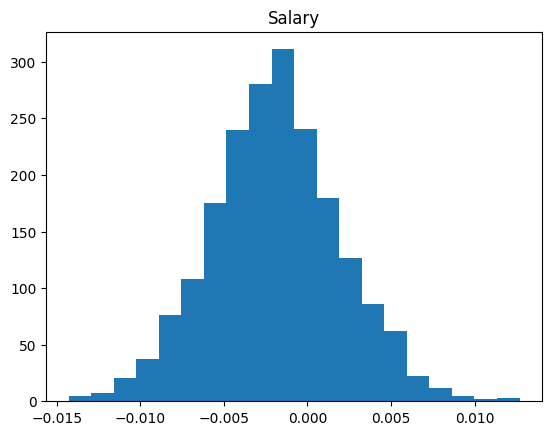

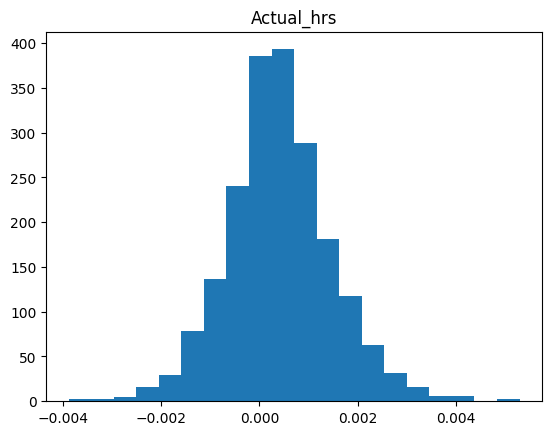

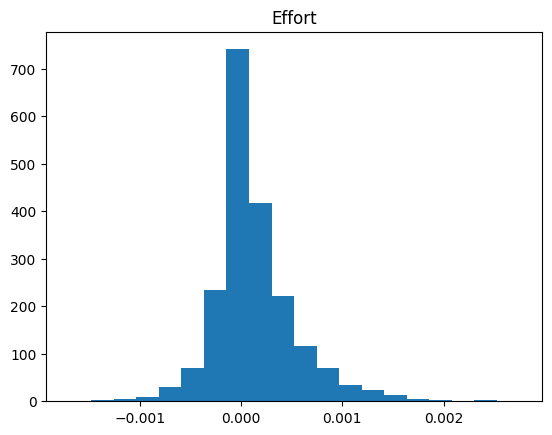

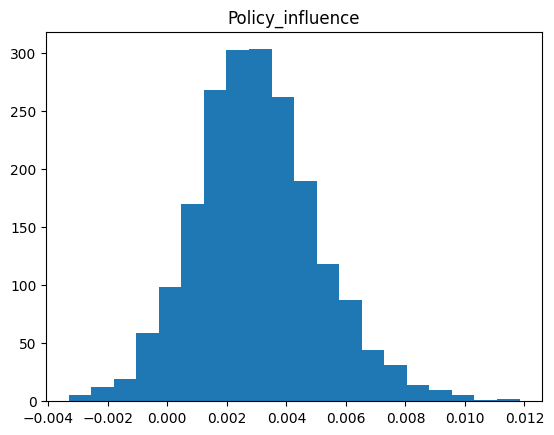

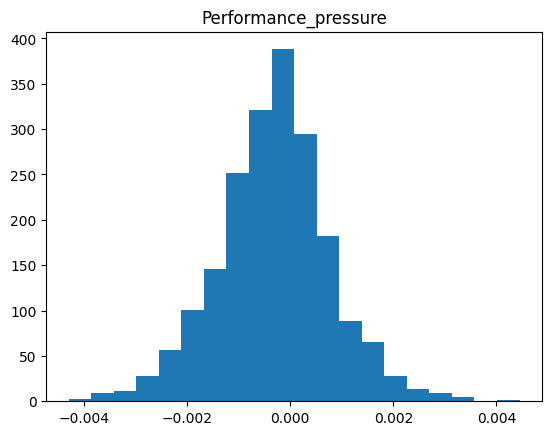

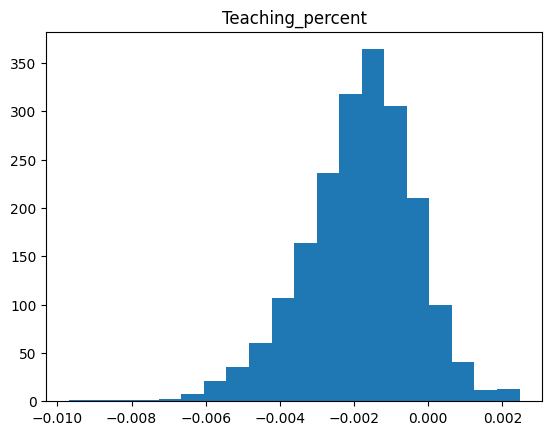

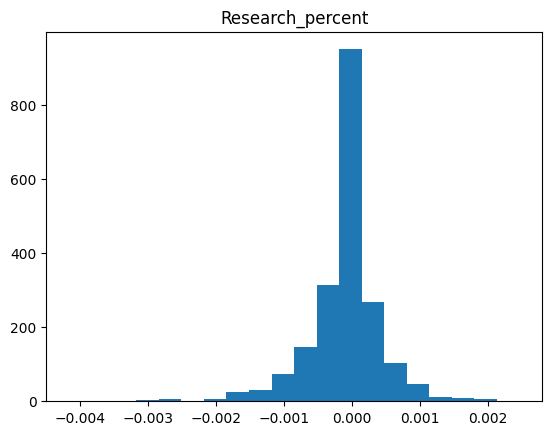

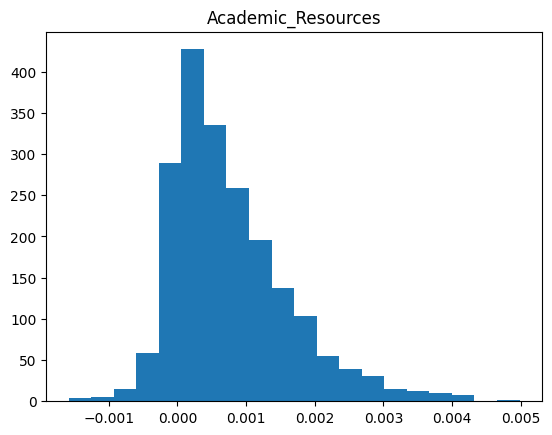

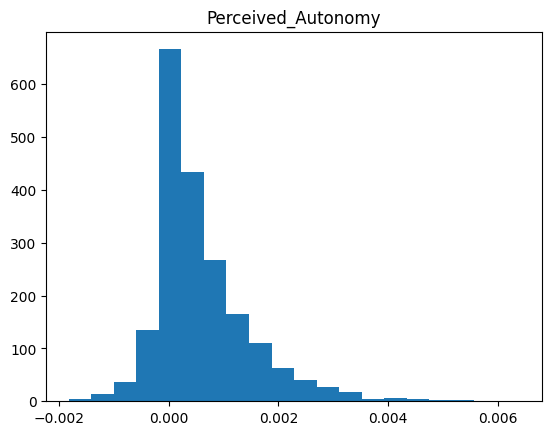

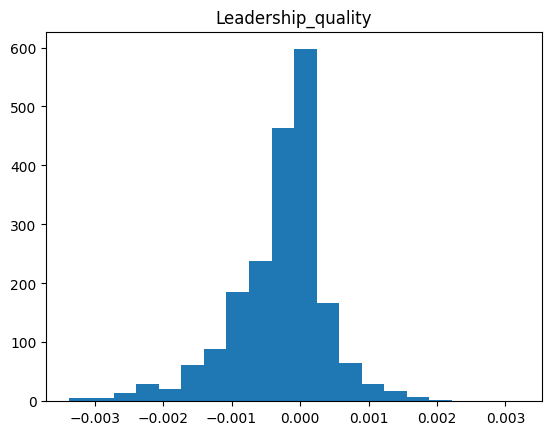

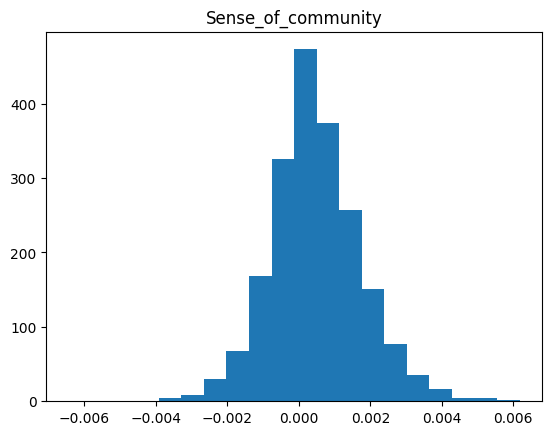

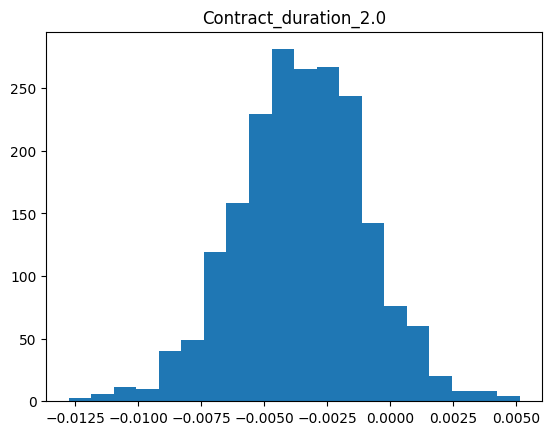

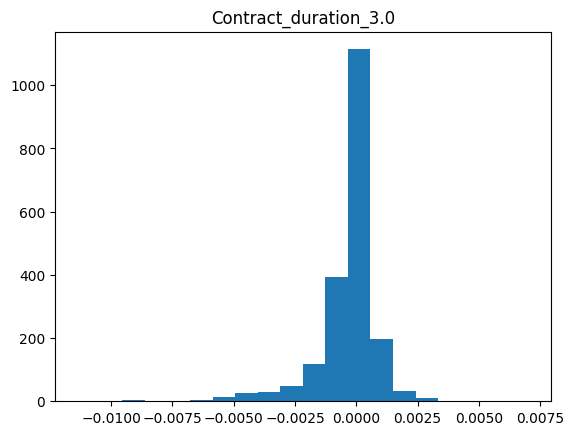

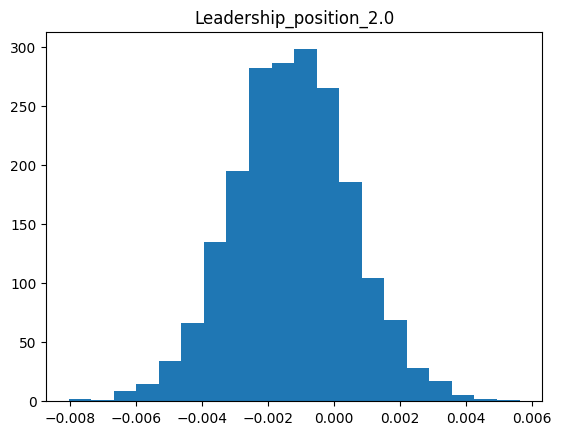

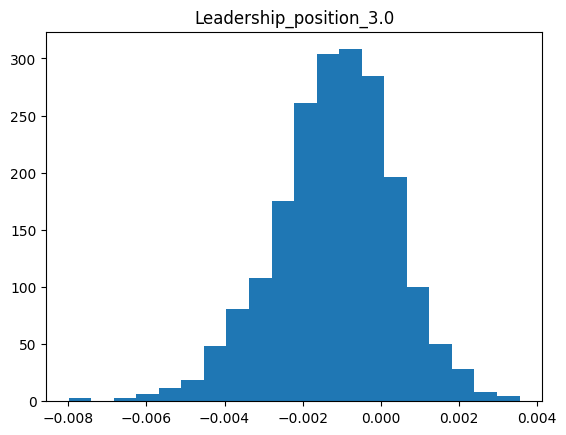

In [110]:
for curr_pos in Current_position_dummy_cols[1:2]:
  for col in Working_condition_cols:
    plt.title(col)
    plt.hist(moderation_path_values[col][moderation_path_values['Current_position'].isin([curr_pos])], bins=20)
    plt.show()


In [103]:
mod_lbound_results

,Current_Position,Salary,Actual_hrs,Effort,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Leadership_quality,Sense_of_community,Contract_duration_2.0,Contract_duration_3.0,Leadership_position_2.0,Leadership_position_3.0
0,Current_position_4.0,-0.003245,-0.000744,-0.000374,-0.000358,-0.001847,-0.001936,-0.001060,-0.000382,-0.000791,-0.001377,-0.002518,-0.004348,-0.003042,-0.002333,-0.002272
1,Current_position_5.0,-0.009457,-0.001650,-0.000562,-0.000734,-0.002545,-0.005076,-0.001455,-0.000387,-0.000618,-0.002119,-0.001885,-0.008645,-0.004071,-0.004813,-0.004422
2,Current_position_6.0,-0.014116,-0.001469,-0.000737,-0.001162,-0.003355,-0.006734,-0.001797,-0.001094,-0.001660,-0.001603,-0.005290,-0.007885,-0.004071,-0.007763,-0.003259


In [104]:
mod_ubound_results

,Current_Position,Salary,Actual_hrs,Effort,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Leadership_quality,Sense_of_community,Contract_duration_2.0,Contract_duration_3.0,Leadership_position_2.0,Leadership_position_3.0
0,Current_position_4.0,0.001948,0.001300,0.001193,0.004280,0.001346,0.000685,0.001470,0.002395,0.001926,0.001056,0.002089,0.000537,0.001151,0.000960,0.000736
1,Current_position_5.0,0.005682,0.002704,0.001154,0.007654,0.001913,0.000779,0.000928,0.002936,0.002945,0.000954,0.003242,0.001348,0.001472,0.002240,0.001652
2,Current_position_6.0,0.008314,0.002913,0.001749,0.010997,0.002237,0.001159,0.001046,0.006322,0.007172,0.001844,0.000915,0.001147,0.001472,0.003267,0.000782


In [105]:
mod_pbci_results

,Current_Position,Salary,Actual_hrs,Effort,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Leadership_quality,Sense_of_community,Contract_duration_2.0,Contract_duration_3.0,Leadership_position_2.0,Leadership_position_3.0
0,Current_position_4.0,"[-0.0032, 0.0019]","[-0.0007, 0.0013]","[-0.0004, 0.0012]","[-0.0004, 0.0043]","[-0.0018, 0.0013]","[-0.0019, 0.0007]","[-0.0011, 0.0015]","[-0.0004, 0.0024]","[-0.0008, 0.0019]","[-0.0014, 0.0011]","[-0.0025, 0.0021]","[-0.0043, 0.0005]","[-0.003, 0.0012]","[-0.0023, 0.001]","[-0.0023, 0.0007]"
1,Current_position_5.0,"[-0.0095, 0.0057]","[-0.0017, 0.0027]","[-0.0006, 0.0012]","[-0.0007, 0.0077]","[-0.0025, 0.0019]","[-0.0051, 0.0008]","[-0.0015, 0.0009]","[-0.0004, 0.0029]","[-0.0006, 0.0029]","[-0.0021, 0.001]","[-0.0019, 0.0032]","[-0.0086, 0.0013]","[-0.0041, 0.0015]","[-0.0048, 0.0022]","[-0.0044, 0.0017]"
2,Current_position_6.0,"[-0.0141, 0.0083]","[-0.0015, 0.0029]","[-0.0007, 0.0017]","[-0.0012, 0.011]","[-0.0034, 0.0022]","[-0.0067, 0.0012]","[-0.0018, 0.001]","[-0.0011, 0.0063]","[-0.0017, 0.0072]","[-0.0016, 0.0018]","[-0.0053, 0.0009]","[-0.0079, 0.0011]","[-0.0041, 0.0015]","[-0.0078, 0.0033]","[-0.0033, 0.0008]"


##Calculating the Bias-Corrected Confidence Intervals:

In [ ]:
moderation_path_values.columns.tolist()

['Bootstrap_nr',
 'Salary_mod_Age',
 'Actual_hrs_mod_Age',
 'Effort_mod_Age',
 'Policy_influence_mod_Age',
 'Performance_pressure_mod_Age',
 'Teaching_percent_mod_Age',
 'Research_percent_mod_Age',
 'Academic_Resources_mod_Age',
 'Perceived_Autonomy_mod_Age',
 'Leadership_quality_mod_Age',
 'Sense_of_community_mod_Age',
 'Job_satisfaction_mod_Age',
 'Current_position_4.0_mod_Age',
 'Current_position_5.0_mod_Age',
 'Current_position_6.0_mod_Age',
 'Contract_duration_2.0_mod_Age',
 'Contract_duration_3.0_mod_Age',
 'Leadership_position_2.0_mod_Age',
 'Leadership_position_3.0_mod_Age',
 'DoF',
 'DoF Baseline',
 'chi2',
 'chi2 p-value',
 'chi2 Baseline',
 'CFI',
 'GFI',
 'AGFI',
 'NFI',
 'TLI',
 'RMSEA',
 'AIC',
 'BIC',
 'LogLik']

In [ ]:
## Analyzing bootstrap pathways:
BCA_CI_results = pd.DataFrame(columns = ['Current_position']+Working_condition_cols+['Job_satisfaction'])
BCA_lbound_results = pd.DataFrame(columns = ['Current_position']+Working_condition_cols+['Job_satisfaction'])
BCA_ubound_results = pd.DataFrame(columns = ['Current_position']+Working_condition_cols+['Job_satisfaction'])
for curr_pos in Current_position_dummy_cols:
  # print("-"*50)
  # print(curr_pos, ":")
  bca_ci = [curr_pos]
  bca_lbound = [curr_pos]
  bca_ubound = [curr_pos]
  data = bootstrap_path_values[bootstrap_path_values['Current_position'].isin([curr_pos])].reset_index(drop=True).iloc[:,2:]
  for col in Working_condition_cols+['Job_satisfaction']:
    data_for_bootstrap = data[col].to_numpy()
    res = bootstrap([data_for_bootstrap], np.mean, n_resamples=200, confidence_level=0.95, method='BCa', rng=316)
    ci_value = '('+round(res.confidence_interval.low,4).astype(str)+', '+round(res.confidence_interval.high, 4).astype(str)+')'
    bca_ci.append(ci_value)
    bca_lbound.append(res.confidence_interval.low)
    bca_ubound.append(res.confidence_interval.high)
    # print(f"95% BCa Confidence Interval ({col}): ({res.confidence_interval.low:.4f}, {res.confidence_interval.high:.4f})")
  BCA_CI_results.loc[len(BCA_CI_results)] = bca_ci
  BCA_lbound_results.loc[len(BCA_lbound_results)] = bca_lbound
  BCA_ubound_results.loc[len(BCA_ubound_results)] = bca_ubound

## Analyzing mediation pathways:
Med_CI_Results = pd.DataFrame(columns = Working_condition_cols)
Med_lbound_Results = pd.DataFrame(columns = Working_condition_cols)
Med_ubound_Results = pd.DataFrame(columns = Working_condition_cols)
med_ci = []
med_lbound = []
med_ubound = []
for col in Working_condition_cols:
  data_for_bootstrap = mediation_path_values[col]
  res = bootstrap([data_for_bootstrap], np.mean, n_resamples=200, confidence_level=0.95, method='BCa', rng = 316)
  ci_value = '('+round(res.confidence_interval.low,4).astype(str)+', '+round(res.confidence_interval.high, 4).astype(str)+')'
  med_ci.append(ci_value)
  med_lbound.append(res.confidence_interval.low)
  med_ubound.append(res.confidence_interval.high)
Med_CI_Results.loc[len(Med_CI_Results)] = med_ci
Med_lbound_Results.loc[len(Med_lbound_Results)] = med_lbound
Med_ubound_Results.loc[len(Med_ubound_Results)] = med_ubound



## Analyzing moderation pathways:
Mod_CI_Results = pd.DataFrame(columns = Moderation_cols)
Mod_lbound_Results = pd.DataFrame(columns = Moderation_cols)
Mod_ubound_Results = pd.DataFrame(columns = Moderation_cols)
mod_ci = []
mod_lbound = []
mod_ubound = []
for col in Moderation_cols:
  data_for_bootstrap = moderation_path_values[col]
  res = bootstrap([data_for_bootstrap], np.mean, n_resamples=200, confidence_level=0.95, method='BCa', rng = 316)
  ci_value = '('+round(res.confidence_interval.low,4).astype(str)+', '+round(res.confidence_interval.high, 4).astype(str)+')'
  mod_ci.append(ci_value)
  mod_lbound.append(res.confidence_interval.low)
  mod_ubound.append(res.confidence_interval.high)
Mod_CI_Results.loc[len(Mod_CI_Results)] = mod_ci
Mod_lbound_Results.loc[len(Mod_lbound_Results)] = mod_lbound
Mod_ubound_Results.loc[len(Mod_ubound_Results)] = mod_ubound



## Analyzing bootstrap pathways with no moderation:
BCA_no_mod_CI_results = pd.DataFrame(columns = ['Current_position']+Working_condition_cols+['Job_satisfaction'])
BCA_no_mod_lbound_results = pd.DataFrame(columns = ['Current_position']+Working_condition_cols+['Job_satisfaction'])
BCA_no_mod_ubound_results = pd.DataFrame(columns = ['Current_position']+Working_condition_cols+['Job_satisfaction'])
for curr_pos in Current_position_dummy_cols:
  bca_ci = [curr_pos]
  bca_lbound = [curr_pos]
  bca_ubound = [curr_pos]
  data = bootstrap_path_values_no_mod[bootstrap_path_values_no_mod['Current_position'].isin([curr_pos])].reset_index(drop=True).iloc[:,2:]
  for col in Working_condition_cols+['Job_satisfaction']:
    data_for_bootstrap = data[col].to_numpy()
    res = bootstrap([data_for_bootstrap], np.mean, n_resamples=200, confidence_level=0.95, method='BCa', rng = 316)
    ci_value = '('+round(res.confidence_interval.low,4).astype(str)+', '+round(res.confidence_interval.high, 4).astype(str)+')'
    bca_ci.append(ci_value)
    bca_lbound.append(res.confidence_interval.low)
    bca_ubound.append(res.confidence_interval.high)
  BCA_no_mod_CI_results.loc[len(BCA_no_mod_CI_results)] = bca_ci
  BCA_no_mod_lbound_results.loc[len(BCA_no_mod_lbound_results)] = bca_lbound
  BCA_no_mod_ubound_results.loc[len(BCA_no_mod_ubound_results)] = bca_ubound


## Analyzing mediation pathways with no moderation:
Med_no_mod_CI_Results = pd.DataFrame(columns = Working_condition_cols)
Med_no_mod_lbound_Results = pd.DataFrame(columns = Working_condition_cols)
Med_no_mod_ubound_Results = pd.DataFrame(columns = Working_condition_cols)
med_ci = []
med_lbound = []
med_ubound = []
for col in Working_condition_cols:
  data_for_bootstrap = mediation_path_values_no_mod[col]
  res = bootstrap([data_for_bootstrap], np.mean, n_resamples=200, confidence_level=0.95, method='BCa', rng = 316)
  ci_value = '('+round(res.confidence_interval.low,4).astype(str)+', '+round(res.confidence_interval.high, 4).astype(str)+')'
  med_ci.append(ci_value)
  med_lbound.append(res.confidence_interval.low)
  med_ubound.append(res.confidence_interval.high)
Med_no_mod_CI_Results.loc[len(Med_no_mod_CI_Results)] = med_ci
Med_no_mod_lbound_Results.loc[len(Med_no_mod_lbound_Results)] = med_lbound
Med_no_mod_ubound_Results.loc[len(Med_no_mod_ubound_Results)] = med_ubound

In [ ]:
BCA_CI_results.set_index('Current_position').T

Current_position,Current_position_4.0,Current_position_5.0,Current_position_6.0
Salary,"(0.0611, 0.0657)","(0.1916, 0.2056)","(0.25, 0.2677)"
Actual_hrs,"(0.0043, 0.0068)","(0.0112, 0.0161)","(0.01, 0.0148)"
Effort,"(0.0124, 0.0151)","(0.0107, 0.0136)","(0.0097, 0.013)"
Policy_influence,"(-0.0048, -0.0019)","(-0.0109, -0.0043)","(-0.0116, -0.0046)"
Performance_pressure,"(0.0158, 0.019)","(0.0217, 0.026)","(0.0246, 0.0293)"
Teaching_percent,"(0.0038, 0.0061)","(0.0147, 0.0209)","(0.02, 0.0277)"
Research_percent,"(0.0066, 0.0094)","(-0.0048, -0.002)","(-0.0167, -0.0124)"
Academic_Resources,"(0.0325, 0.0453)","(0.0654, 0.0775)","(0.1861, 0.2048)"
Perceived_Autonomy,"(0.0133, 0.0204)","(0.0256, 0.0336)","(0.0897, 0.0999)"
Leadership_quality,"(0.0011, 0.0037)","(-0.0019, 0.0012)","(-0.0028, 0.0012)"


In [ ]:
BCA_lbound_results

,Current_position,Salary,Actual_hrs,Effort,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Leadership_quality,Sense_of_community,Contract_duration_2.0,Contract_duration_3.0,Leadership_position_2.0,Leadership_position_3.0,Job_satisfaction
0,Current_position_4.0,0.061072,0.004299,0.012404,-0.004798,0.015817,0.003841,0.006605,0.032453,0.013295,0.001137,-0.002301,-0.021018,0.003591,0.018814,0.007262,-0.104549
1,Current_position_5.0,0.191563,0.011207,0.010722,-0.010873,0.021734,0.014717,-0.004762,0.065413,0.025610,-0.001890,-0.003827,-0.043854,0.005027,0.052951,0.015185,0.058384
2,Current_position_6.0,0.250014,0.010030,0.009726,-0.011608,0.024610,0.019973,-0.016668,0.186067,0.089676,-0.002837,0.002551,-0.037713,0.005178,0.063519,0.011124,0.164793


In [ ]:
BCA_ubound_results

,Current_position,Salary,Actual_hrs,Effort,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Leadership_quality,Sense_of_community,Contract_duration_2.0,Contract_duration_3.0,Leadership_position_2.0,Leadership_position_3.0,Job_satisfaction
0,Current_position_4.0,0.065692,0.006761,0.015062,-0.001890,0.019029,0.006099,0.009387,0.045287,0.020396,0.003692,0.000453,-0.016671,0.006230,0.021234,0.009004,-0.073437
1,Current_position_5.0,0.205576,0.016108,0.013551,-0.004305,0.025959,0.020906,-0.002003,0.077531,0.033610,0.001167,-0.000913,-0.035138,0.008414,0.059134,0.018839,0.097332
2,Current_position_6.0,0.267723,0.014820,0.013030,-0.004639,0.029274,0.027650,-0.012368,0.204777,0.099857,0.001220,0.006529,-0.030323,0.008609,0.072866,0.013735,0.224291


In [ ]:
Med_CI_Results

,Salary,Actual_hrs,Effort,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Leadership_quality,Sense_of_community,Contract_duration_2.0,Contract_duration_3.0,Leadership_position_2.0,Leadership_position_3.0
0,"(0.0336, 0.036)","(0.0016, 0.0023)","(-0.0019, -0.0017)","(-0.0112, -0.0043)","(0.047, 0.0545)","(-0.0015, -0.0011)","(-0.0039, -0.0033)","(0.442, 0.4577)","(0.2472, 0.2605)","(0.067, 0.0758)","(0.0712, 0.0814)","(0.0715, 0.0885)","(-0.1297, -0.079)","(0.1982, 0.2225)","(0.0963, 0.1185)"


In [ ]:
Med_lbound_Results

,Salary,Actual_hrs,Effort,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Leadership_quality,Sense_of_community,Contract_duration_2.0,Contract_duration_3.0,Leadership_position_2.0,Leadership_position_3.0
0,0.033646,0.001589,-0.001879,-0.011242,0.046986,-0.001532,-0.003947,0.441964,0.24723,0.067042,0.071183,0.071455,-0.129691,0.198154,0.096273


In [ ]:
Med_ubound_Results

,Salary,Actual_hrs,Effort,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Leadership_quality,Sense_of_community,Contract_duration_2.0,Contract_duration_3.0,Leadership_position_2.0,Leadership_position_3.0
0,0.03603,0.002255,-0.001651,-0.004346,0.054455,-0.001102,-0.00326,0.457693,0.260451,0.075847,0.081374,0.088524,-0.079014,0.222514,0.118526


In [ ]:
Mod_CI_Results

,Salary_mod_Age,Actual_hrs_mod_Age,Effort_mod_Age,Policy_influence_mod_Age,Performance_pressure_mod_Age,Teaching_percent_mod_Age,Research_percent_mod_Age,Academic_Resources_mod_Age,Perceived_Autonomy_mod_Age,Leadership_quality_mod_Age,Sense_of_community_mod_Age,Job_satisfaction_mod_Age,Current_position_4.0_mod_Age,Current_position_5.0_mod_Age,Current_position_6.0_mod_Age,Contract_duration_2.0_mod_Age,Contract_duration_3.0_mod_Age,Leadership_position_2.0_mod_Age,Leadership_position_3.0_mod_Age
0,"(-0.0008, -0.0007)","(-0.0001, -0.0)","(0.0, 0.0)","(-0.0, 0.0001)","(-0.0012, -0.0011)","(0.0, 0.0)","(0.0001, 0.0001)","(-0.0098, -0.0095)","(-0.0057, -0.0055)","(-0.0017, -0.0015)","(-0.0015, -0.0013)","(0.0212, 0.0213)","(0.0012, 0.002)","(-0.0025, -0.0015)","(-0.0048, -0.0034)","(-0.0026, -0.0023)","(0.0008, 0.0023)","(-0.0045, -0.004)","(-0.0024, -0.0019)"


In [ ]:
Mod_lbound_Results

,Salary_mod_Age,Actual_hrs_mod_Age,Effort_mod_Age,Policy_influence_mod_Age,Performance_pressure_mod_Age,Teaching_percent_mod_Age,Research_percent_mod_Age,Academic_Resources_mod_Age,Perceived_Autonomy_mod_Age,Leadership_quality_mod_Age,Sense_of_community_mod_Age,Job_satisfaction_mod_Age,Current_position_4.0_mod_Age,Current_position_5.0_mod_Age,Current_position_6.0_mod_Age,Contract_duration_2.0_mod_Age,Contract_duration_3.0_mod_Age,Leadership_position_2.0_mod_Age,Leadership_position_3.0_mod_Age
0,-0.000762,-0.000057,0.000036,-0.000017,-0.001233,0.000009,0.000071,-0.009838,-0.005747,-0.001677,-0.001518,0.021206,0.001216,-0.0025,-0.004763,-0.00265,0.000835,-0.004511,-0.002439


In [ ]:
Mod_ubound_Results

,Salary_mod_Age,Actual_hrs_mod_Age,Effort_mod_Age,Policy_influence_mod_Age,Performance_pressure_mod_Age,Teaching_percent_mod_Age,Research_percent_mod_Age,Academic_Resources_mod_Age,Perceived_Autonomy_mod_Age,Leadership_quality_mod_Age,Sense_of_community_mod_Age,Job_satisfaction_mod_Age,Current_position_4.0_mod_Age,Current_position_5.0_mod_Age,Current_position_6.0_mod_Age,Contract_duration_2.0_mod_Age,Contract_duration_3.0_mod_Age,Leadership_position_2.0_mod_Age,Leadership_position_3.0_mod_Age
0,-0.00071,-0.000041,0.000041,0.000142,-0.001082,0.000019,0.000086,-0.009517,-0.005456,-0.00149,-0.001289,0.021277,0.001995,-0.001533,-0.003444,-0.002274,0.002257,-0.003995,-0.001929


In [ ]:
BCA_no_mod_CI_results

,Current_position,Salary,Actual_hrs,Effort,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Leadership_quality,Sense_of_community,Contract_duration_2.0,Contract_duration_3.0,Leadership_position_2.0,Leadership_position_3.0,Job_satisfaction
0,Current_position_4.0,"(0.0253, 0.0293)","(0.0067, 0.0087)","(0.0084, 0.0103)","(0.0105, 0.0128)","(0.0027, 0.0046)","(0.0024, 0.0042)","(0.0031, 0.0047)","(0.0377, 0.0526)","(0.0123, 0.0185)","(0.0015, 0.0041)","(-0.0025, -0.0001)","(-0.0007, 0.0021)","(0.0044, 0.0069)","(0.009, 0.0104)","(0.0035, 0.0046)","(-0.0572, -0.0399)"
1,Current_position_5.0,"(0.0805, 0.0914)","(0.0165, 0.0204)","(0.0071, 0.009)","(0.0235, 0.0282)","(0.0037, 0.0066)","(0.0126, 0.0171)","(-0.0025, -0.001)","(0.0766, 0.0904)","(0.0234, 0.0308)","(-0.002, 0.0009)","(-0.0036, -0.0011)","(-0.0014, 0.0044)","(0.0057, 0.0087)","(0.0251, 0.0287)","(0.0072, 0.0097)","(0.0682, 0.0917)"
2,Current_position_6.0,"(0.1064, 0.1222)","(0.0149, 0.0189)","(0.0062, 0.0084)","(0.0264, 0.032)","(0.0041, 0.0069)","(0.0172, 0.0232)","(-0.0076, -0.0054)","(0.2159, 0.2359)","(0.0801, 0.0897)","(-0.0023, 0.0015)","(0.0021, 0.0051)","(-0.0013, 0.0036)","(0.006, 0.0091)","(0.0296, 0.0346)","(0.0052, 0.0076)","(0.2098, 0.237)"


In [ ]:
BCA_no_mod_lbound_results

,Current_position,Salary,Actual_hrs,Effort,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Leadership_quality,Sense_of_community,Contract_duration_2.0,Contract_duration_3.0,Leadership_position_2.0,Leadership_position_3.0,Job_satisfaction
0,Current_position_4.0,0.025288,0.006675,0.008350,0.010457,0.002691,0.002368,0.003075,0.037683,0.012344,0.001469,-0.002480,-0.000750,0.004393,0.009012,0.003484,-0.057198
1,Current_position_5.0,0.080544,0.016509,0.007069,0.023493,0.003733,0.012595,-0.002458,0.076640,0.023385,-0.002035,-0.003646,-0.001410,0.005717,0.025143,0.007224,0.068171
2,Current_position_6.0,0.106390,0.014864,0.006225,0.026397,0.004101,0.017171,-0.007645,0.215898,0.080142,-0.002320,0.002146,-0.001314,0.006018,0.029586,0.005217,0.209839


In [ ]:
BCA_no_mod_ubound_results

,Current_position,Salary,Actual_hrs,Effort,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Leadership_quality,Sense_of_community,Contract_duration_2.0,Contract_duration_3.0,Leadership_position_2.0,Leadership_position_3.0,Job_satisfaction
0,Current_position_4.0,0.029263,0.008715,0.010344,0.012820,0.004574,0.004235,0.004750,0.052594,0.018537,0.004121,-0.000113,0.002063,0.006921,0.010436,0.004629,-0.039890
1,Current_position_5.0,0.091365,0.020366,0.008968,0.028219,0.006600,0.017062,-0.000955,0.090363,0.030763,0.000911,-0.001076,0.004442,0.008695,0.028671,0.009704,0.091670
2,Current_position_6.0,0.122160,0.018904,0.008378,0.032035,0.006949,0.023230,-0.005412,0.235880,0.089651,0.001465,0.005080,0.003646,0.009129,0.034573,0.007622,0.237027


In [ ]:
Med_no_mod_CI_Results

,Salary,Actual_hrs,Effort,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Leadership_quality,Sense_of_community,Contract_duration_2.0,Contract_duration_3.0,Leadership_position_2.0,Leadership_position_3.0
0,"(0.0142, 0.0165)","(0.0023, 0.0028)","(-0.0013, -0.0011)","(0.0241, 0.0292)","(0.0084, 0.0136)","(-0.0014, -0.001)","(-0.0019, -0.0016)","(0.5174, 0.5249)","(0.2227, 0.23)","(0.0662, 0.0716)","(0.0665, 0.0731)","(-0.0098, 0.0026)","(-0.131, -0.0862)","(0.0944, 0.107)","(0.0448, 0.0592)"


In [ ]:
Med_no_mod_lbound_Results

,Salary,Actual_hrs,Effort,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Leadership_quality,Sense_of_community,Contract_duration_2.0,Contract_duration_3.0,Leadership_position_2.0,Leadership_position_3.0
0,0.014226,0.002336,-0.001271,0.024077,0.008395,-0.001374,-0.001919,0.517382,0.222659,0.066214,0.066491,-0.009791,-0.131026,0.094354,0.044805


In [ ]:
Med_no_mod_ubound_Results

,Salary,Actual_hrs,Effort,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Leadership_quality,Sense_of_community,Contract_duration_2.0,Contract_duration_3.0,Leadership_position_2.0,Leadership_position_3.0
0,0.016508,0.00283,-0.001089,0.029181,0.01359,-0.00103,-0.001552,0.524854,0.230007,0.071551,0.073144,0.002573,-0.086191,0.107029,0.05916


In [ ]:
cleaned_col_list = [item.replace('_mod_Age', '') for item in Mod_lbound_Results.columns]
cleaned_col_list

Mod_lbound_new_name = Mod_lbound_Results
Mod_ubound_new_name = Mod_ubound_Results
Mod_lbound_new_name.columns = cleaned_col_list
Mod_ubound_new_name.columns = cleaned_col_list

Mod_lbound_new_name

,Salary,Actual_hrs,Effort,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Leadership_quality,Sense_of_community,Job_satisfaction,Current_position_4.0,Current_position_5.0,Current_position_6.0,Contract_duration_2.0,Contract_duration_3.0,Leadership_position_2.0,Leadership_position_3.0
0,-0.000762,-0.000057,0.000036,-0.000017,-0.001233,0.000009,0.000071,-0.009838,-0.005747,-0.001677,-0.001518,0.021206,0.001216,-0.0025,-0.004763,-0.00265,0.000835,-0.004511,-0.002439


In [ ]:
Med_path_df = pd.DataFrame()
Med_path_df['Med_Lbound'] = Med_lbound_Results.T
Med_path_df['Med_Ubound'] = Med_ubound_Results.T
Med_path_df['Med_No_Mod_Lbound'] = Med_no_mod_lbound_Results.T
Med_path_df['Med_No_Mod_Ubound'] = Med_no_mod_ubound_Results.T
Med_path_df['Mod_Lbound'] = Mod_lbound_new_name.T
Med_path_df['Mod_Ubound'] = Mod_ubound_new_name.T

med_sig = []
mod_sig = []

for i in range(len(Med_path_df)):
  if Med_path_df['Mod_Lbound'].iloc[i] <=0 and Med_path_df['Mod_Ubound'].iloc[i] >=0:
    mod_sig.append('Not Significant')
  else:
    mod_sig.append('Significant')
  if Med_path_df['Med_Lbound'].iloc[i] >= Med_path_df['Med_No_Mod_Ubound'].iloc[i] or Med_path_df['Med_Ubound'].iloc[i] <= Med_path_df['Med_No_Mod_Lbound'].iloc[i]:
    med_sig.append('Significant')
  else:
    med_sig.append('Not Significant')

Med_path_df['Med Sig'] = med_sig
Med_path_df['Mod Sig'] = mod_sig

Med_path_df

,Med_Lbound,Med_Ubound,Med_No_Mod_Lbound,Med_No_Mod_Ubound,Mod_Lbound,Mod_Ubound,Med Sig,Mod Sig
Salary,0.033646,0.036030,0.014226,0.016508,-0.000762,-0.000710,Significant,Significant
Actual_hrs,0.001589,0.002255,0.002336,0.002830,-0.000057,-0.000041,Significant,Significant
Effort,-0.001879,-0.001651,-0.001271,-0.001089,0.000036,0.000041,Significant,Significant
Policy_influence,-0.011242,-0.004346,0.024077,0.029181,-0.000017,0.000142,Significant,Not Significant
Performance_pressure,0.046986,0.054455,0.008395,0.013590,-0.001233,-0.001082,Significant,Significant
Teaching_percent,-0.001532,-0.001102,-0.001374,-0.001030,0.000009,0.000019,Not Significant,Significant
Research_percent,-0.003947,-0.003260,-0.001919,-0.001552,0.000071,0.000086,Significant,Significant
Academic_Resources,0.441964,0.457693,0.517382,0.524854,-0.009838,-0.009517,Significant,Significant
Perceived_Autonomy,0.247230,0.260451,0.222659,0.230007,-0.005747,-0.005456,Significant,Significant
Leadership_quality,0.067042,0.075847,0.066214,0.071551,-0.001677,-0.001490,Not Significant,Significant


In [ ]:
## Mediation/Moderation analysis: https://pmc.ncbi.nlm.nih.gov/articles/PMC2908713/